# Case iFood - Data Analyst


**Project Overview — iFood Selection Process**

This project was developed as part of a technical assessment for the iFood recruitment process.

In this notebook, we perform a complete **Exploratory Data Analysis (EDA)** to investigate the dataset, uncover patterns, detect potential anomalies, and generate relevant hypotheses.

EDA plays a key role in guiding feature engineering and improving model performance by helping us understand the data structure and reducing the risk of bias.



## 📘 Data Dictionary

### 👤 Personal Information

- `ID`: Unique customer identifier  
- `Year_Birth`: Customer's year of birth  
- `Education`: Customer's education level  
- `Marital_Status`: Customer's marital status  
- `Income`: Annual household income  
- `Kidhome`: Number of children in the household  
- `Teenhome`: Number of teenagers in the household  
- `Dt_Customer`: Date when the customer registered with the company  
- `Recency`: Number of days since the customer’s last purchase  
- `Complain`: 1 if the customer has complained in the past 2 years, 0 otherwise  

### 🛍️ Product Purchase Data

- `MntWines`: Amount spent on wine in the last 2 years  
- `MntFruits`: Amount spent on fruits in the last 2 years  
- `MntMeatProducts`: Amount spent on meat in the last 2 years  
- `MntFishProducts`: Amount spent on fish in the last 2 years  
- `MntSweetProducts`: Amount spent on sweets in the last 2 years  
- `MntGoldProds`: Amount spent on gold products in the last 2 years  

### 📢 Campaign Response Data

- `NumDealsPurchases`: Number of purchases made using discounts  
- `AcceptedCmp1`: 1 if the customer accepted the offer from Campaign 1, 0 otherwise  
- `AcceptedCmp2`: 1 if the customer accepted the offer from Campaign 2, 0 otherwise  
- `AcceptedCmp3`: 1 if the customer accepted the offer from Campaign 3, 0 otherwise  
- `AcceptedCmp4`: 1 if the customer accepted the offer from Campaign 4, 0 otherwise  
- `AcceptedCmp5`: 1 if the customer accepted the offer from Campaign 5, 0 otherwise  
- `Response`: 1 if the customer accepted the offer from the last (pilot) campaign, 0 otherwise (**target variable**)  

### 🏪 Purchase Channel Data

- `NumWebPurchases`: Number of purchases made through the company’s website  
- `NumCatalogPurchases`: Number of purchases made via catalog  
- `NumStorePurchases`: Number of purchases made in-store  
- `NumWebVisitsMonth`: Number of website visits in the last month  



## 📥 Importing the Dataset

In this step, we load the dataset into a DataFrame using pandas.  
This is the starting point for all data exploration and preprocessing activities.

We'll also take a quick look at the structure of the data to ensure it was loaded correctly.


In [1]:
import pandas as pd
pd.options.mode.copy_on_write = True

DATA = "../data/ml_project1_data.csv"

df = pd.read_csv(DATA, sep='\t', engine='python')

df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [2]:
with pd.option_context(
    "display.float_format",
    "{:.2f}".format,
    "display.max_columns",
    None,
):
    display(df.describe())


ID  Year_Birth    Income  Kidhome  Teenhome  Recency  MntWines  \
count  2240.00     2240.00   2216.00  2240.00   2240.00  2240.00   2240.00   
mean   5592.16     1968.81  52247.25     0.44      0.51    49.11    303.94   
std    3246.66       11.98  25173.08     0.54      0.54    28.96    336.60   
min       0.00     1893.00   1730.00     0.00      0.00     0.00      0.00   
25%    2828.25     1959.00  35303.00     0.00      0.00    24.00     23.75   
50%    5458.50     1970.00  51381.50     0.00      0.00    49.00    173.50   
75%    8427.75     1977.00  68522.00     1.00      1.00    74.00    504.25   
max   11191.00     1996.00 666666.00     2.00      2.00    99.00   1493.00   

       MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count    2240.00          2240.00          2240.00           2240.00   
mean       26.30           166.95            37.53             27.06   
std        39.77           225.72            54.63             41.28   
min         0.00             0.00             0.00              0.00   
25%         1.00            16.00             3.00              1.00   
50%         8.00            67.00            12.00              8.00   
75%        33.00           232.00            50.00             33.00   
max       199.00          1725.00           259.00            263.00   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count       2240.00            2240.00          2240.00              2240.00   
mean          44.02               2.33             4.08                 2.66   
std           52.17               1.93             2.78                 2.92   
min            0.00               0.00             0.00                 0.00   
25%            9.00               1.00             2.00                 0.00   
50%           24.00               2.00             4.00                 2.00   
75%           56.00               3.00             6.00                 4.00   
max          362.00              15.00            27.00                28.00   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count            2240.00            2240.00       2240.00       2240.00   
mean                5.79               5.32          0.07          0.07   
std                 3.25               2.43          0.26          0.26   
min                 0.00               0.00          0.00          0.00   
25%                 3.00               3.00          0.00          0.00   
50%                 5.00               6.00          0.00          0.00   
75%                 8.00               7.00          0.00          0.00   
max                13.00              20.00          1.00          1.00   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
count       2240.00       2240.00       2240.00   2240.00        2240.00   
mean           0.07          0.06          0.01      0.01           3.00   
std            0.26          0.25          0.11      0.10           0.00   
min            0.00          0.00          0.00      0.00           3.00   
25%            0.00          0.00          0.00      0.00           3.00   
50%            0.00          0.00          0.00      0.00           3.00   
75%            0.00          0.00          0.00      0.00           3.00   
max            1.00          1.00          1.00      1.00           3.00   

       Z_Revenue  Response  
count    2240.00   2240.00  
mean       11.00      0.15  
std         0.00      0.36  
min        11.00      0.00  
25%        11.00      0.00  
50%        11.00      0.00  
75%        11.00      0.00  
max        11.00      1.00

In [3]:
df.describe(exclude="number")

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  31-08-2012
freq          1127            864          12

In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df)

#profile.to_file("../reports/eda.html")



## 📊 Profile Report Analysis

Based on the Profile Report, we can observe the following:

- There are possible **outliers** in the columns **`Year_Birth`** and **`Income`**.  
- There is a **significant skew** in the distribution of columns related to the **amount spent on products**.



## 🧹 Handling Missing Values and Formatting Dates

We removed the rows with missing values, as they represent only **1% of the dataset (24 entries)** and are **not significant enough to impact the analysis**.

We also reformatted the **`Dt_Customer`** column to the **Day-Month-Year** (`DD-MM-YYYY`) format for better readability.


In [6]:
df = df.dropna()

df.loc[:, "Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

df.head()


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

           Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0  2012-09-04 00:00:00       58       635  ...                  7   
1  2014-03-08 00:00:00       38        11  ...                  5   
2  2013-08-21 00:00:00       26       426  ...                  4   
3  2014-02-10 00:00:00       26        11  ...                  6   
4  2014-01-19 00:00:00       94       173  ...                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  
0         0              3         11         1  
1         0              3         11         0  
2         0              3         11         0  
3         0              3         11         0  
4         0              3         11         0  

[5 rows x 29 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [8]:
df["Dt_Customer"] = df["Dt_Customer"].astype('datetime64[ns]')

In [9]:
df["Dt_Customer"].describe()

count                             2216
mean     2013-07-10 11:29:27.509025280
min                2012-07-30 00:00:00
25%                2013-01-16 00:00:00
50%                2013-07-08 12:00:00
75%                2013-12-31 00:00:00
max                2014-06-29 00:00:00
Name: Dt_Customer, dtype: object


### 🛠️ **Creating New Features**

To better prepare the data for model training, we created new columns that provide more meaningful insights.

One of them is **`DaysSinceEnrolled`**, which represents the **number of days since the customer registered** with the company.


In [10]:
df["DaysSinceEnrolled"] = df["Dt_Customer"].max() - df["Dt_Customer"]
df["DaysSinceEnrolled"] = df["DaysSinceEnrolled"].dt.days

df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response  DaysSinceEnrolled  
0         11         1                663  
1         11         0                113  
2         11         0                312  
3         11         0                139  
4         11         0                161  

[5 rows x 30 columns]

In [11]:
df["YearsSinceEnrolled"] = df["DaysSinceEnrolled"] // 365
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0             0         0              3         11         1   
1             0             0         0              3         11         0   
2             0             0         0              3         11         0   
3             0             0         0              3         11         0   
4             0             0         0              3         11         0   

   DaysSinceEnrolled  YearsSinceEnrolled  
0                663                   1  
1                113                   0  
2                312                   0  
3                139                   0  
4                161                   0  

[5 rows x 31 columns]

In [12]:
df["YearsSinceEnrolled"].value_counts()

YearsSinceEnrolled
0    1144
1    1072
Name: count, dtype: int64


## 🗓️ **Creating an Age Column**

To calculate the age of each customer, we subtracted the **`Year_Birth`** from the current year (based on the latest registration date in the **`Dt_Customer`** column). The code below does this calculation:


In [13]:
df["Age"] = df["Dt_Customer"].max().year - df["Year_Birth"]

df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  AcceptedCmp1  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0         0              3         11         1   
1             0         0              3         11         0   
2             0         0              3         11         0   
3             0         0              3         11         0   
4             0         0              3         11         0   

   DaysSinceEnrolled  YearsSinceEnrolled  Age  
0                663                   1   57  
1                113                   0   60  
2                312                   0   49  
3                139                   0   30  
4                161                   0   33  

[5 rows x 32 columns]


## 🗓️ **Creating Age Groups**

To categorize the ages into meaningful groups, we defined age ranges and assigned each customer to an appropriate group. This new column is called **`AgeGroup`**, which categorizes customers based on their age.


In [14]:
df["Age"].describe()

count    2216.000000
mean       45.179603
std        11.985554
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64


### 🗓️ **Age Groups**

We defined age groups based on the following ranges:

- **Young Adult**: 18-30  
- **Adult**: 31-45  
- **Senior Adult**: 46-60  
- **Senior**: 60+


In [15]:
df['Age'] = df['Age'].astype(float)

In [16]:
df["AgeGroup"] = pd.cut(
    df["Age"],
    bins=[18, 30, 45, 60, df["Age"].max()],
    labels=["18-30", "31-45", "46-60", "61+"],
    include_lowest=True
)

In [17]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp1  AcceptedCmp2  Complain  \
0  2012-09-04       58       635  ...             0             0         0   
1  2014-03-08       38        11  ...             0             0         0   
2  2013-08-21       26       426  ...             0             0         0   
3  2014-02-10       26        11  ...             0             0         0   
4  2014-01-19       94       173  ...             0             0         0   

   Z_CostContact  Z_Revenue  Response  DaysSinceEnrolled  YearsSinceEnrolled  \
0              3         11         1                663                   1   
1              3         11         0                113                   0   
2              3         11         0                312                   0   
3              3         11         0                139                   0   
4              3         11         0                161                   0   

    Age  AgeGroup  
0  57.0     46-60  
1  60.0     46-60  
2  49.0     46-60  
3  30.0     18-30  
4  33.0     31-45  

[5 rows x 33 columns]

In [18]:
df[["Age", "AgeGroup"]][df["Age"] == 18].head()

Age AgeGroup
46    18.0    18-30
1170  18.0    18-30

In [19]:
df["AgeGroup"].value_counts()

AgeGroup
31-45    965
46-60    727
61+      267
18-30    257
Name: count, dtype: int64

In [20]:
df.columns[df.columns.str.startswith("Mnt")]

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'],
      dtype='object')

In [21]:
df.loc[:, df.columns.str.startswith("Mnt")]

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2235       709         43              182               42               118   
2236       406          0               30                0                 0   
2237       908         48              217               32                12   
2238       428         30              214               80                30   
2239        84          3               61                2                 1   

      MntGoldProds  
0               88  
1                6  
2               42  
3                5  
4               15  
...            ...  
2235           247  
2236             8  
2237            24  
2238            61  
2239            21  

[2216 rows x 6 columns]


## 🛒 **Creating the Columns `MntTotal` and `MntRegularProds`**

### These columns aggregate several features and calculate the total spending on all products.

- **`MntTotal`** represents the total amount spent on all products by the customer, including all categories.
- **`MntRegularProds`** is the total amount spent on regular products, excluding the gold products.

### Note:  
Upon analysis, we decided that the **`MntGoldProds`** column represents unique items, separate from the other product categories. Therefore, this column was excluded from the **`MntTotal`** calculation.


In [22]:
df["MntTotal"] = (
    df["MntWines"]
    + df["MntFruits"]
    + df["MntMeatProducts"]
    + df["MntFishProducts"]
    + df["MntSweetProducts"]
    + df["MntGoldProds"]
)

df["MntRegularProds"] = df["MntTotal"] - df["MntGoldProds"]

df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Complain  Z_CostContact  Z_Revenue  \
0  2012-09-04       58       635  ...         0              3         11   
1  2014-03-08       38        11  ...         0              3         11   
2  2013-08-21       26       426  ...         0              3         11   
3  2014-02-10       26        11  ...         0              3         11   
4  2014-01-19       94       173  ...         0              3         11   

   Response  DaysSinceEnrolled  YearsSinceEnrolled   Age  AgeGroup  MntTotal  \
0         1                663                   1  57.0     46-60      1617   
1         0                113                   0  60.0     46-60        27   
2         0                312                   0  49.0     46-60       776   
3         0                139                   0  30.0     18-30        53   
4         0                161                   0  33.0     31-45       422   

   MntRegularProds  
0             1529  
1               21  
2              734  
3               48  
4              407  

[5 rows x 35 columns]

In [23]:
df.tail()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  Complain  Z_CostContact  \
2235         1  2013-06-13       46       709  ...         0              3   
2236         1  2014-06-10       56       406  ...         0              3   
2237         0  2014-01-25       91       908  ...         0              3   
2238         1  2014-01-24        8       428  ...         0              3   
2239         1  2012-10-15       40        84  ...         0              3   

      Z_Revenue  Response  DaysSinceEnrolled  YearsSinceEnrolled   Age  \
2235         11         0                381                   1  47.0   
2236         11         0                 19                   0  68.0   
2237         11         0                155                   0  33.0   
2238         11         0                156                   0  58.0   
2239         11         1                622                   1  60.0   

      AgeGroup  MntTotal  MntRegularProds  
2235     46-60      1341             1094  
2236       61+       444              436  
2237     31-45      1241             1217  
2238     46-60       843              782  
2239     46-60       172              151  

[5 rows x 35 columns]


### 💭 **Reflection on the 'Gold' Product Line**

- **Are gold products more expensive?**  
  We should explore whether gold products have a higher price point compared to other categories, as this could explain why they are treated as a separate product line rather than just another item in the total expenditure.

- **Do wealthier customers buy more gold products?**  
  It would be interesting to analyze whether customers with higher income levels tend to spend more on gold products. This could help us understand if there is a correlation between income and luxury product purchases.



## 👶 **Creating the `Children` Column**

To simplify the dataset, we created a new column called **`Children`** by summing the **`Kidhome`** (number of children at home) and **`Teenhome`** (number of teenagers at home) columns. This gives us the total number of children in the household.


In [24]:
df["Children"] = df["Kidhome"] + df["Teenhome"]

In [25]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Z_CostContact  Z_Revenue  Response  \
0  2012-09-04       58       635  ...              3         11         1   
1  2014-03-08       38        11  ...              3         11         0   
2  2013-08-21       26       426  ...              3         11         0   
3  2014-02-10       26        11  ...              3         11         0   
4  2014-01-19       94       173  ...              3         11         0   

   DaysSinceEnrolled  YearsSinceEnrolled   Age  AgeGroup  MntTotal  \
0                663                   1  57.0     46-60      1617   
1                113                   0  60.0     46-60        27   
2                312                   0  49.0     46-60       776   
3                139                   0  30.0     18-30        53   
4                161                   0  33.0     31-45       422   

   MntRegularProds  Children  
0             1529         0  
1               21         2  
2              734         0  
3               48         1  
4              407         1  

[5 rows x 36 columns]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i


## 🚼 **Creating a Flag Column for Children**

We created a binary indicator column called **`HasChildren`**, which shows whether the customer has children or not.  
- **0** indicates the customer **does not have children**.  
- **1** indicates the customer **has children**.


In [27]:
# criando uma coluna indicadora(flag)
df["HasChildren"] = df["Children"].apply(lambda x: 1 if x > 0 else 0)

df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Z_Revenue  Response  DaysSinceEnrolled  \
0  2012-09-04       58       635  ...         11         1                663   
1  2014-03-08       38        11  ...         11         0                113   
2  2013-08-21       26       426  ...         11         0                312   
3  2014-02-10       26        11  ...         11         0                139   
4  2014-01-19       94       173  ...         11         0                161   

   YearsSinceEnrolled   Age  AgeGroup  MntTotal  MntRegularProds  Children  \
0                   1  57.0     46-60      1617             1529         0   
1                   0  60.0     46-60        27               21         2   
2                   0  49.0     46-60       776              734         0   
3                   0  30.0     18-30        53               48         1   
4                   0  33.0     31-45       422              407         1   

   HasChildren  
0            0  
1            1  
2            0  
3            1  
4            1  

[5 rows x 37 columns]

In [28]:
df["HasChildren"].value_counts()

HasChildren
1    1583
0     633
Name: count, dtype: int64


## 💍 **Renaming the `Marital_Status` Column**

We renamed some values in the **`Marital_Status`** column to combine similar categories, making it easier to interpret and analyze.


In [29]:
df["Marital_Status"] = df["Marital_Status"].replace(
    {
        "Alone": "Single",
        "Absurd": "Single",
        "YOLO": "Single",
        "Together": "Partner",
        "Married": "Partner",
        "Widow": "Partner",
        "Single": "Single",
        "Divorced": "Single"
    }
)   

In [30]:
df["Marital_Status"].value_counts()

Marital_Status
Partner    1506
Single      710
Name: count, dtype: int64

In [31]:
df.is_copy = False


## 🎯 **Creating the `AcceptedCmpTotal` and `HasAcceptedCmp` Columns**

- The **`AcceptedCmpTotal`** column represents the **total number of campaigns** the customer participated in. This is calculated by summing the individual campaign acceptance columns (e.g., **`AcceptedCmp1`**, **`AcceptedCmp2`**, etc.).

- The **`HasAcceptedCmp`** column is a binary flag that indicates whether the customer has participated in **any campaign**.  
  - **1** means the customer has participated in at least one campaign.  
  - **0** means the customer has not participated in any campaign.


In [32]:
df["AcceptedCmpTotal"] = (
    df["AcceptedCmp1"]
    + df["AcceptedCmp2"]
    + df["AcceptedCmp3"]
    + df["AcceptedCmp4"]
    + df["AcceptedCmp5"]
)

df["HasAcceptedCmp"] = df["AcceptedCmpTotal"].apply(lambda x: 1 if x > 0 else 0)


In [33]:
df["AcceptedCmpTotal"].value_counts()

AcceptedCmpTotal
0    1757
1     323
2      81
3      44
4      11
Name: count, dtype: int64

In [34]:
df["HasAcceptedCmp"].value_counts()

HasAcceptedCmp
0    1757
1     459
Name: count, dtype: int64

In [35]:
df.loc[:, df.columns.str.startswith("Num")]

NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2235                  2                9                    3   
2236                  7                8                    2   
2237                  1                2                    3   
2238                  2                6                    5   
2239                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  
0                     4                  7  
1                     2                  5  
2                    10                  4  
3                     4                  6  
4                     6                  5  
...                 ...                ...  
2235                  4                  5  
2236                  5                  7  
2237                 13                  6  
2238                 10                  3  
2239                  4                  7  

[2216 rows x 5 columns]


## 🛍️ **Creating the `NumTotalPurchases` Column**

The **`NumTotalPurchases`** column sums up the total number of sales made by the company across all sales channels, including:

- **Website sales**, represented by the **`NumWebPurchases`** column.
- **Catalog sales**, represented by the **`NumCatalogPurchases`** column.
- **In-store sales**, represented by the **`NumStorePurchases`** column.

This gives us the total number of purchases made by each customer across all platforms.


In [36]:
df["NumTotalPurchases"] = (
    df["NumWebPurchases"]
    +df["NumCatalogPurchases"]
    +df["NumStorePurchases"]
)

df["NumTotalPurchases"].value_counts()

NumTotalPurchases
4     200
6     188
5     179
7     127
3     125
18    102
14     98
16     98
17     88
20     85
21     85
19     85
15     83
11     77
13     75
22     75
23     63
12     62
10     54
24     52
8      50
9      44
25     39
26     24
27     22
28     10
29      6
0       6
1       5
32      3
31      2
30      2
2       2
Name: count, dtype: int64


## 📊 **Identifying Outliers**

Outliers are abnormal values in the dataset—data points that are significantly distant from the majority of other values.

The plot below helps identify outliers in three key columns: **`Age`**, **`Income`**, and **`MntTotal`**.


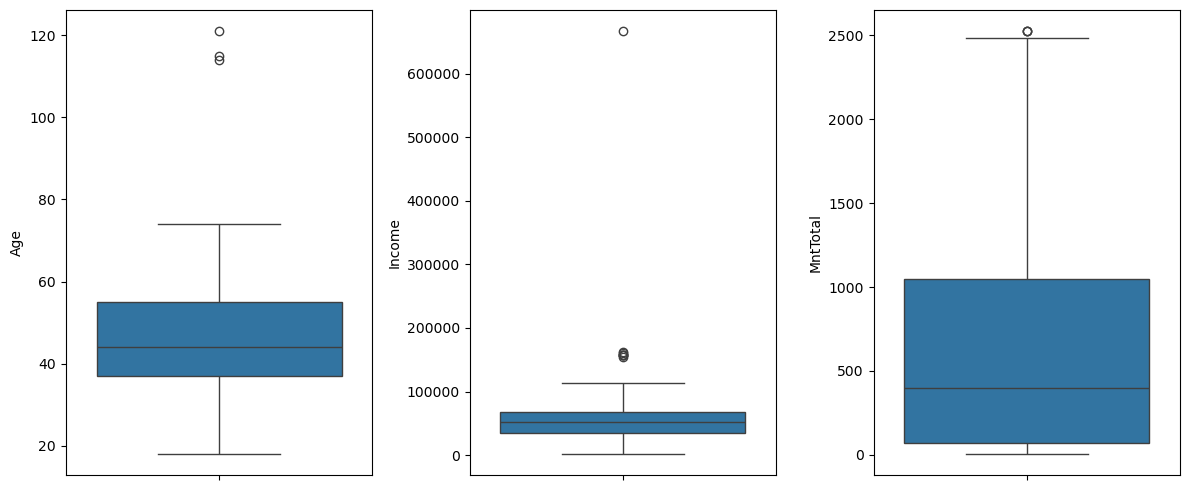

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

search_outliers = ["Age", "Income", "MntTotal"]

fig, axs =  plt.subplots(nrows=1, ncols=3, figsize=(12, 5), tight_layout=True)

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=df, ax=axs[i])

plt.show()



## 🧰 **Creating a Helper Function**

A helper function called **`inspect_outliers`** was created and is located in the Python file named **`auxiliary_functions.py`**.

This function takes two arguments:
- the **dataset (`dataframe`)**  
- the **column (`column`)** you want to inspect

It is designed to help identify and visualize potential outliers within the specified column.

In [38]:
from auxiliary_functions import inspect_outliers

inspect_outliers(df, "Age")

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900  2n Cycle         Single  36640.0        1         0   
239  11004        1893  2n Cycle         Single  60182.0        0         1   
339   1150        1899       PhD        Partner  83532.0        0         0   

    Dt_Customer  Recency  MntWines  ...  YearsSinceEnrolled    Age  AgeGroup  \
192  2013-09-26       99        15  ...                   0  114.0       61+   
239  2014-05-17       23         8  ...                   0  121.0       61+   
339  2013-09-26       36       755  ...                   0  115.0       61+   

     MntTotal  MntRegularProds  Children  HasChildren  AcceptedCmpTotal  \
192        65               40         1            1                 0   
239        22               20         1            1                 0   
339      1853             1629         0            0                 1   

     HasAcceptedCmp  NumTotalPurchases  
192               0                  5  
239               0                  3  
339               1                 14  

[3 rows x 40 columns]


## 🧹 **Removing Outliers**

We removed outliers from the **`Age`** column to avoid distortions in the analysis and modeling.

In [39]:
df = df.drop(inspect_outliers(df, "Age").index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2213 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2213 non-null   int64         
 1   Year_Birth           2213 non-null   int64         
 2   Education            2213 non-null   object        
 3   Marital_Status       2213 non-null   object        
 4   Income               2213 non-null   float64       
 5   Kidhome              2213 non-null   int64         
 6   Teenhome             2213 non-null   int64         
 7   Dt_Customer          2213 non-null   datetime64[ns]
 8   Recency              2213 non-null   int64         
 9   MntWines             2213 non-null   int64         
 10  MntFruits            2213 non-null   int64         
 11  MntMeatProducts      2213 non-null   int64         
 12  MntFishProducts      2213 non-null   int64         
 13  MntSweetProducts     2213 non-null   i

In [40]:
inspect_outliers(df, "Income")

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
164    8475        1973         PhD        Partner  157243.0        0   
617    1503        1976         PhD        Partner  162397.0        1   
655    5555        1975  Graduation         Single  153924.0        0   
687    1501        1982         PhD        Partner  160803.0        0   
1300   5336        1971      Master        Partner  157733.0        1   
1653   4931        1977  Graduation        Partner  157146.0        0   
2132  11181        1949         PhD        Partner  156924.0        0   
2233   9432        1977  Graduation        Partner  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  YearsSinceEnrolled   Age  \
164          1  2014-03-01       98        20  ...                   0  41.0   
617          1  2013-06-03       31        85  ...                   1  38.0   
655          0  2014-02-07       81         1  ...                   0  39.0   
687          0  2012-08-04       21        55  ...                   1  32.0   
1300         0  2013-06-04       37        39  ...                   1  43.0   
1653         0  2013-04-29       13         1  ...                   1  37.0   
2132         0  2013-08-29       85         2  ...                   0  65.0   
2233         0  2013-06-02       23         9  ...                   1  37.0   

      AgeGroup  MntTotal  MntRegularProds  Children  HasChildren  \
164      31-45      1608             1607         1            1   
617      31-45       107              105         2            1   
655      31-45         6                5         0            0   
687      31-45      1717             1713         0            0   
1300     31-45        59               51         1            1   
1653     31-45      1730             1729         0            0   
2132       61+         8                7         0            0   
2233     31-45        62               50         1            1   

      AcceptedCmpTotal  HasAcceptedCmp  NumTotalPurchases  
164                  0               0                 22  
617                  0               0                  1  
655                  0               0                  0  
687                  0               0                 29  
1300                 0               0                  2  
1653                 0               0                 28  
2132                 0               0                  0  
2233                 0               0                  7  

[8 rows x 40 columns]


## 🧹 **Removing Outliers**

We removed outliers from the **`Income`** column to improve the quality of the data and reduce the influence of extreme values on the model.

In [41]:
df = df.drop(inspect_outliers(df, "Income").index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2205 non-null   int64         
 1   Year_Birth           2205 non-null   int64         
 2   Education            2205 non-null   object        
 3   Marital_Status       2205 non-null   object        
 4   Income               2205 non-null   float64       
 5   Kidhome              2205 non-null   int64         
 6   Teenhome             2205 non-null   int64         
 7   Dt_Customer          2205 non-null   datetime64[ns]
 8   Recency              2205 non-null   int64         
 9   MntWines             2205 non-null   int64         
 10  MntFruits            2205 non-null   int64         
 11  MntMeatProducts      2205 non-null   int64         
 12  MntFishProducts      2205 non-null   int64         
 13  MntSweetProducts     2205 non-null   i

In [42]:
df["Income"].describe()

count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64

In [43]:
inspect_outliers(df, "MntTotal")

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
1179  5735        1991      Master         Single  90638.0        0         0   
1492  1763        1988  Graduation        Partner  87679.0        0         0   
1572  5350        1991      Master         Single  90638.0        0         0   

     Dt_Customer  Recency  MntWines  ...  YearsSinceEnrolled   Age  AgeGroup  \
1179  2014-02-13       29      1156  ...                   0  23.0     18-30   
1492  2013-07-27       62      1259  ...                   0  26.0     18-30   
1572  2014-02-13       29      1156  ...                   0  23.0     18-30   

      MntTotal  MntRegularProds  Children  HasChildren  AcceptedCmpTotal  \
1179      2525             2429         0            0                 1   
1492      2524             2491         0            0                 3   
1572      2525             2429         0            0                 1   

      HasAcceptedCmp  NumTotalPurchases  
1179               1                 17  
1492               1                 28  
1572               1                 17  

[3 rows x 40 columns]


## 🔍 **Checking for Outliers**

After applying the outlier removal process, we rechecked the specified columns using **boxplots** to visualize any remaining outliers.


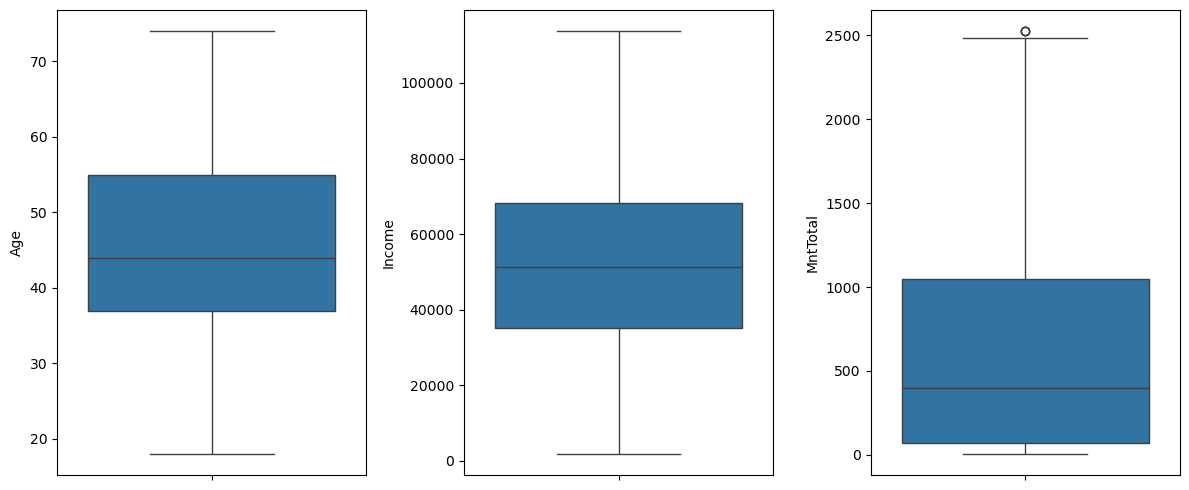

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

search_outliers = ["Age", "Income", "MntTotal"]

fig, axs =  plt.subplots(nrows=1, ncols=3, figsize=(12, 5), tight_layout=True)

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=df, ax=axs[i])

plt.show()


## 🧽 **Dropping Some Columns**

After a thorough analysis of certain features, we concluded that some columns could be removed from the dataset as they did not add significant value to the model.

In [45]:
df = df.drop(
    [
        "ID",
        "Year_Birth",
        "Dt_Customer",
        "Z_CostContact",
        "Z_Revenue"
    ],axis=1
)

df.head()        

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0  Graduation         Single  58138.0        0         0       58       635   
1  Graduation         Single  46344.0        1         1       38        11   
2  Graduation        Partner  71613.0        0         0       26       426   
3  Graduation        Partner  26646.0        1         0       26        11   
4         PhD        Partner  58293.0        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  ...  YearsSinceEnrolled   Age  \
0         88              546              172  ...                   1  57.0   
1          1                6                2  ...                   0  60.0   
2         49              127              111  ...                   0  49.0   
3          4               20               10  ...                   0  30.0   
4         43              118               46  ...                   0  33.0   

   AgeGroup  MntTotal  MntRegularProds  Children  HasChildren  \
0     46-60      1617             1529         0            0   
1     46-60        27               21         2            1   
2     46-60       776              734         0            0   
3     18-30        53               48         1            1   
4     31-45       422              407         1            1   

   AcceptedCmpTotal  HasAcceptedCmp  NumTotalPurchases  
0                 0               0                 22  
1                 0               0                  4  
2                 0               0                 20  
3                 0               0                  6  
4                 0               0                 14  

[5 rows x 35 columns]

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Education            2205 non-null   object  
 1   Marital_Status       2205 non-null   object  
 2   Income               2205 non-null   float64 
 3   Kidhome              2205 non-null   int64   
 4   Teenhome             2205 non-null   int64   
 5   Recency              2205 non-null   int64   
 6   MntWines             2205 non-null   int64   
 7   MntFruits            2205 non-null   int64   
 8   MntMeatProducts      2205 non-null   int64   
 9   MntFishProducts      2205 non-null   int64   
 10  MntSweetProducts     2205 non-null   int64   
 11  MntGoldProds         2205 non-null   int64   
 12  NumDealsPurchases    2205 non-null   int64   
 13  NumWebPurchases      2205 non-null   int64   
 14  NumCatalogPurchases  2205 non-null   int64   
 15  NumStorePurchases    2205 

In [47]:
#df.to_csv("../data/Customers_new_features_and_drop.csv", index=False)

In [48]:
with pd.option_context(
    "display.float_format", "{:.2f}".format,
    "display.max_columns", None,
):
    display(df.describe())


Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
count   2205.00  2205.00   2205.00  2205.00   2205.00    2205.00   
mean   51622.09     0.44      0.51    49.01    306.16      26.40   
std    20713.06     0.54      0.54    28.93    337.49      39.78   
min     1730.00     0.00      0.00     0.00      0.00       0.00   
25%    35196.00     0.00      0.00    24.00     24.00       2.00   
50%    51287.00     0.00      0.00    49.00    178.00       8.00   
75%    68281.00     1.00      1.00    74.00    507.00      33.00   
max   113734.00     2.00      2.00    99.00   1493.00     199.00   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
count          2205.00          2205.00           2205.00       2205.00   
mean            165.31            37.76             27.13         44.06   
std             217.78            54.82             41.13         51.74   
min               0.00             0.00              0.00          0.00   
25%              16.00             3.00              1.00          9.00   
50%              68.00            12.00              8.00         25.00   
75%             232.00            50.00             34.00         56.00   
max            1725.00           259.00            262.00        321.00   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count            2205.00          2205.00              2205.00   
mean                2.32             4.10                 2.65   
std                 1.89             2.74                 2.80   
min                 0.00             0.00                 0.00   
25%                 1.00             2.00                 0.00   
50%                 2.00             4.00                 2.00   
75%                 3.00             6.00                 4.00   
max                15.00            27.00                28.00   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count            2205.00            2205.00       2205.00       2205.00   
mean                5.82               5.34          0.07          0.07   
std                 3.24               2.41          0.26          0.26   
min                 0.00               0.00          0.00          0.00   
25%                 3.00               3.00          0.00          0.00   
50%                 5.00               6.00          0.00          0.00   
75%                 8.00               7.00          0.00          0.00   
max                13.00              20.00          1.00          1.00   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
count       2205.00       2205.00       2205.00   2205.00   2205.00   
mean           0.07          0.06          0.01      0.01      0.15   
std            0.26          0.25          0.12      0.09      0.36   
min            0.00          0.00          0.00      0.00      0.00   
25%            0.00          0.00          0.00      0.00      0.00   
50%            0.00          0.00          0.00      0.00      0.00   
75%            0.00          0.00          0.00      0.00      0.00   
max            1.00          1.00          1.00      1.00      1.00   

       DaysSinceEnrolled  YearsSinceEnrolled     Age  MntTotal  \
count            2205.00             2205.00 2205.00   2205.00   
mean              353.72                0.48   45.10    606.82   
std               202.56                0.50   11.71    601.68   
min                 0.00                0.00   18.00      5.00   
25%               180.00                0.00   37.00     69.00   
50%               356.00                0.00   44.00    397.00   
75%               529.00                1.00   55.00   1047.00   
max               699.00                1.00   74.00   2525.00   

       MntRegularProds  Children  HasChildren  AcceptedCmpTotal  \
count          2205.00   2205.00      2205.00           2205.00   
mean            562.76      0.95         0.72              0.30   
std          

In [49]:
df.describe(exclude="number")

Education Marital_Status AgeGroup
count         2205           2205     2205
unique           5              2        4
top     Graduation        Partner    31-45
freq          1113           1498      958

## 📈 **Creating Pairplots**

- **Pairplots** are multiple plots arranged in a grid that display the relationships and correlations between selected columns.  
- We selected specific columns of interest to analyze how they relate to one another.  
- These columns were chosen based on their relevance to variables such as **income**, **age**, and **purchase behavior over time**.


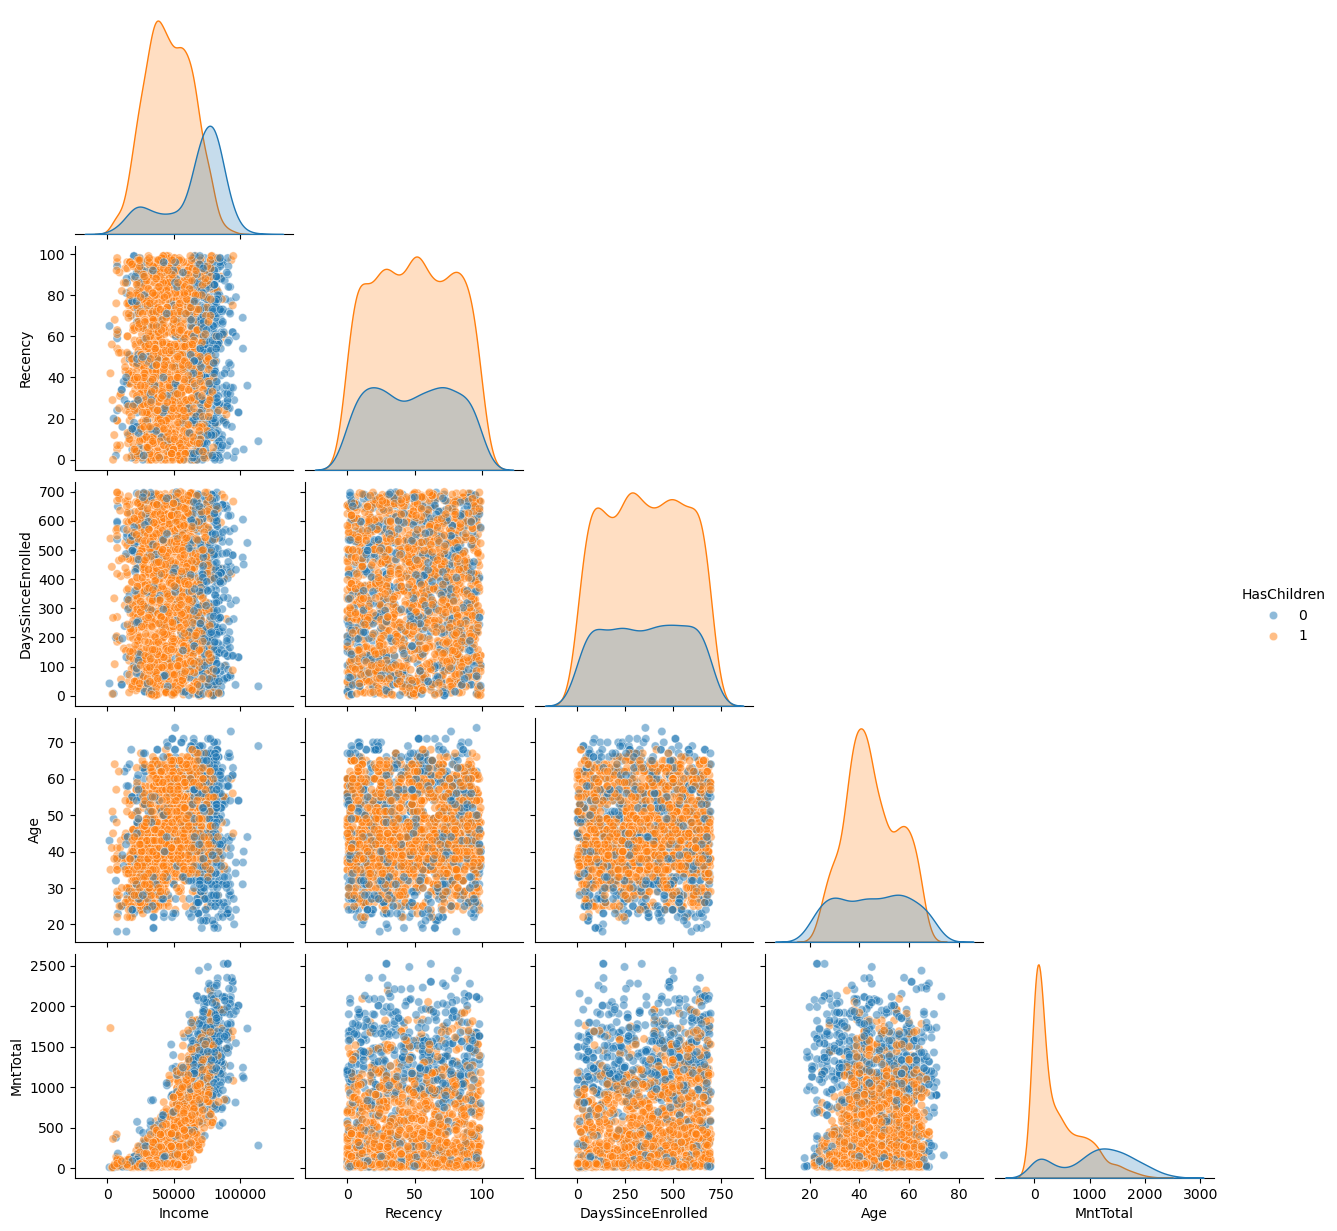

In [86]:
columns_analysis = [
    "Income",
    "Recency",
    "DaysSinceEnrolled",
    "Age",
    "MntTotal",
    "HasChildren"
]

sns.pairplot(
    df[columns_analysis],
    diag_kind = "kde",
    hue = "HasChildren",
    plot_kws=dict(alpha=0.5),
    corner=True,
);

plt.savefig('grafico1.png')

In [87]:
columns_analysis = [
    "Income",
    "Recency",
    "DaysSinceEnrolled",
    "Age",
    "MntTotal",
]

## 🛠️ **Creating a Helper Function**

We created a helper function called **`pairplot`** to simplify the process of generating pairplot grids for exploratory analysis.  
This function makes it easier and more consistent to visualize relationships between selected features.

The function is located in the **`auxiliary_functions.py`** file.

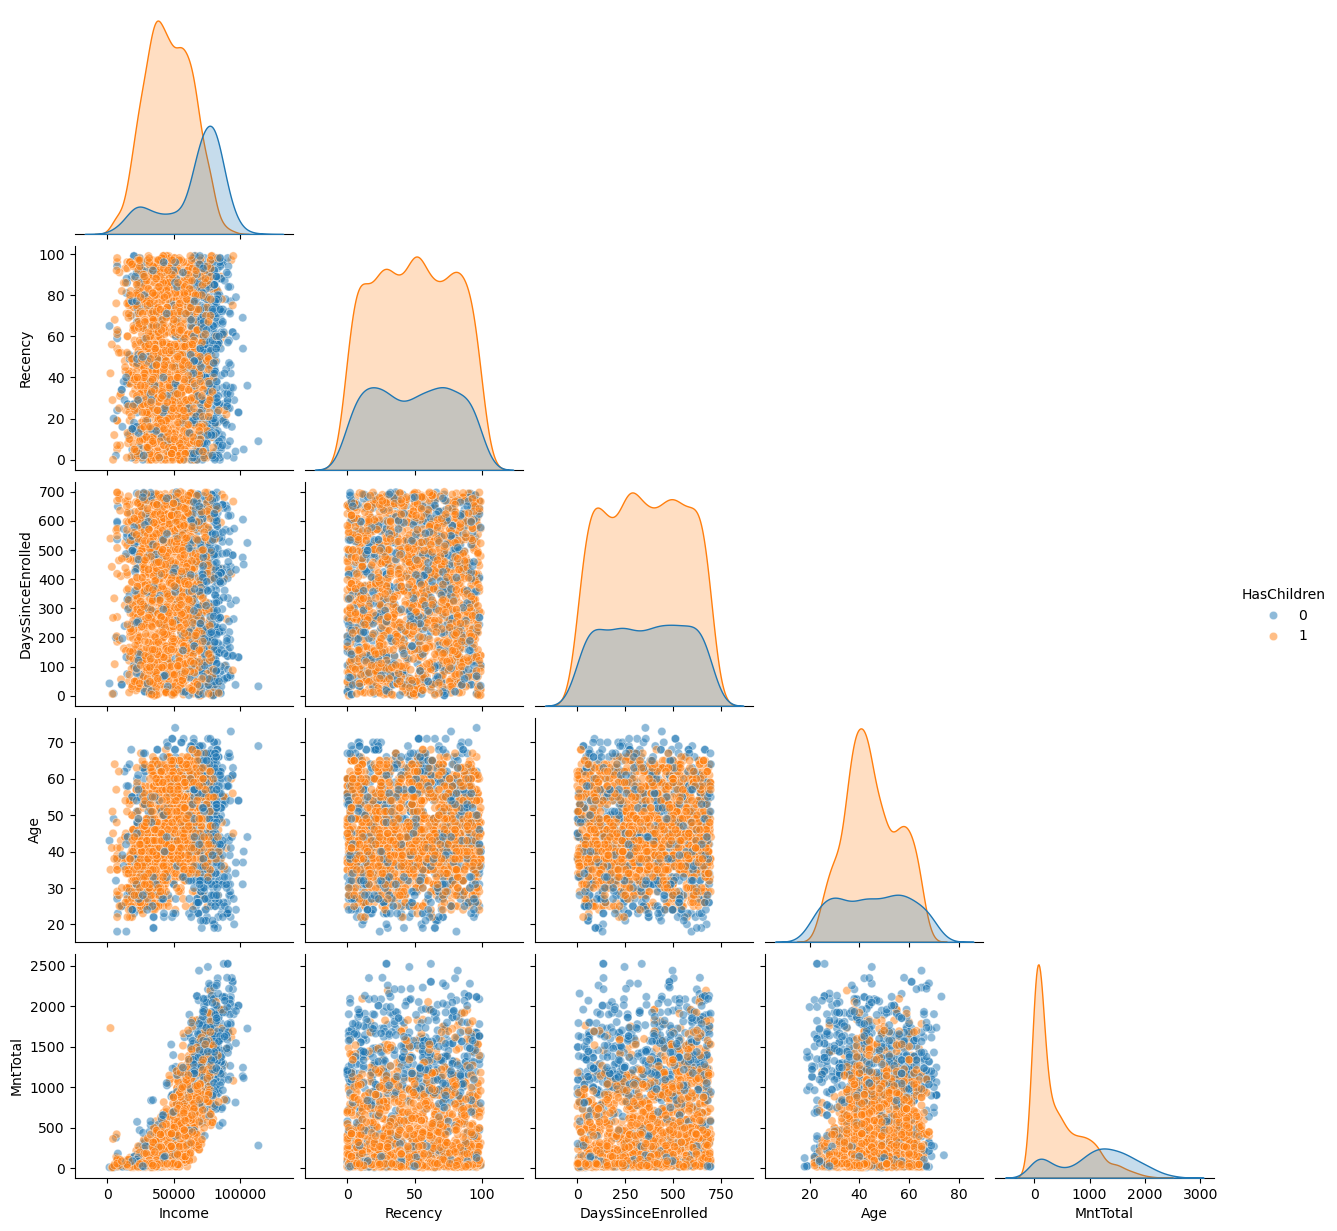

In [88]:
from auxiliary_functions import pairplot

pairplot(df, columns_analysis, "HasChildren")

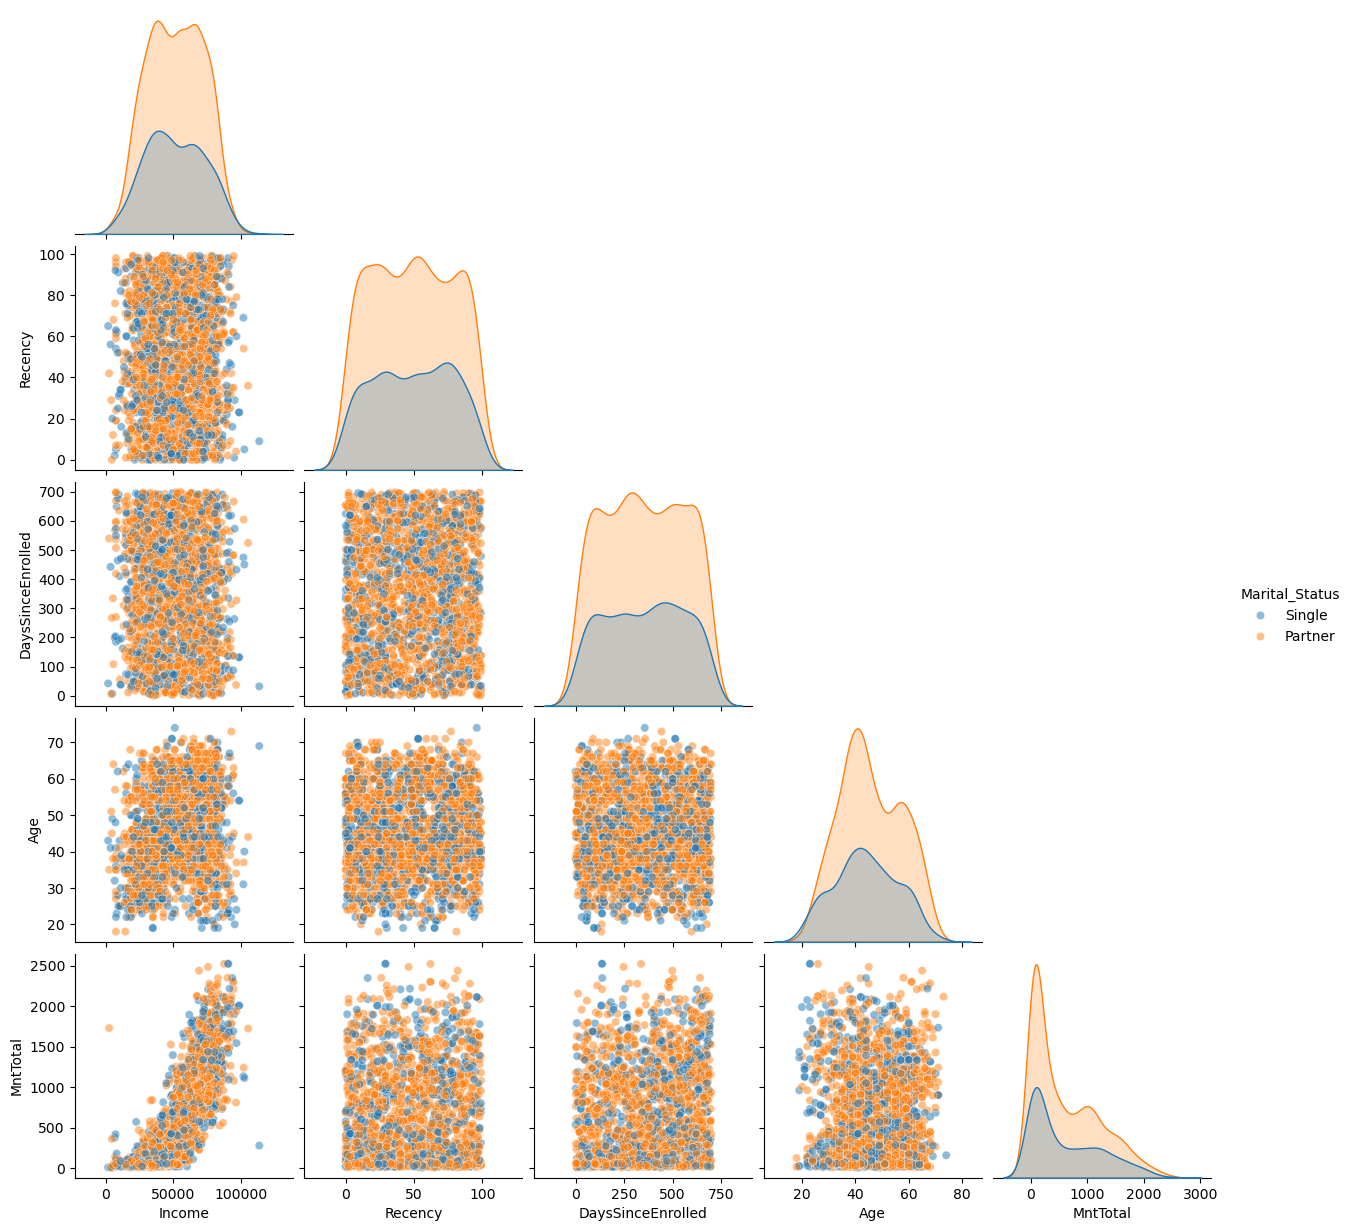

In [89]:
pairplot(df, columns_analysis, "Marital_Status")

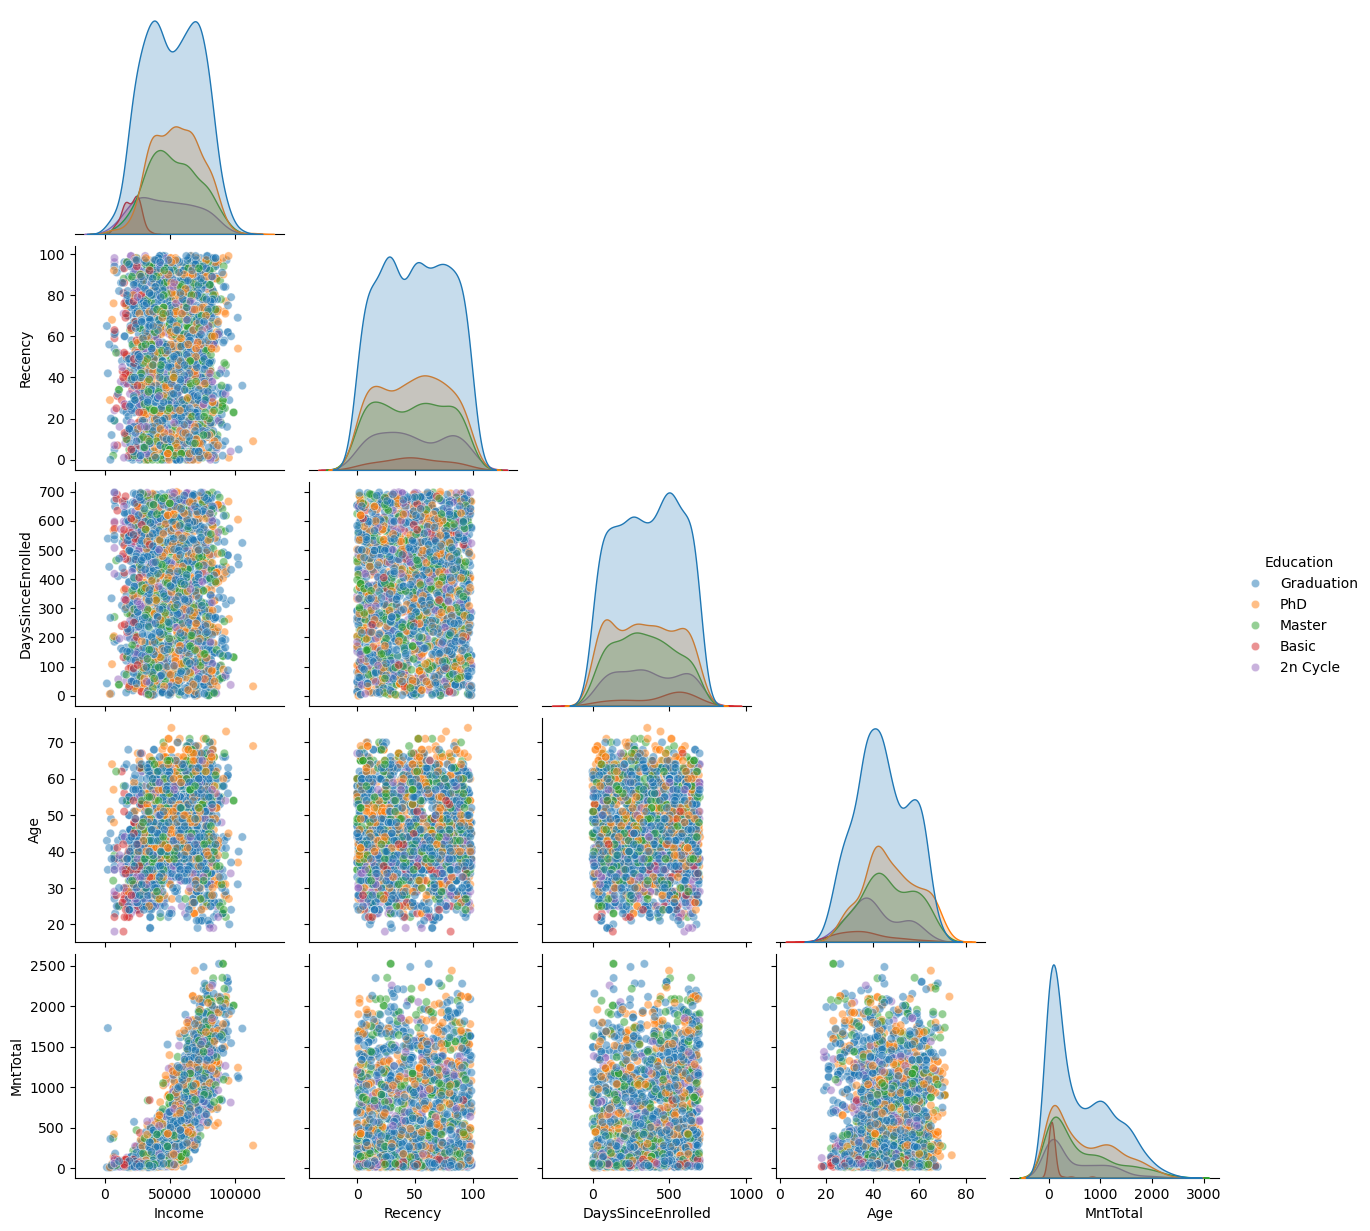

In [90]:
pairplot(df, columns_analysis, "Education")


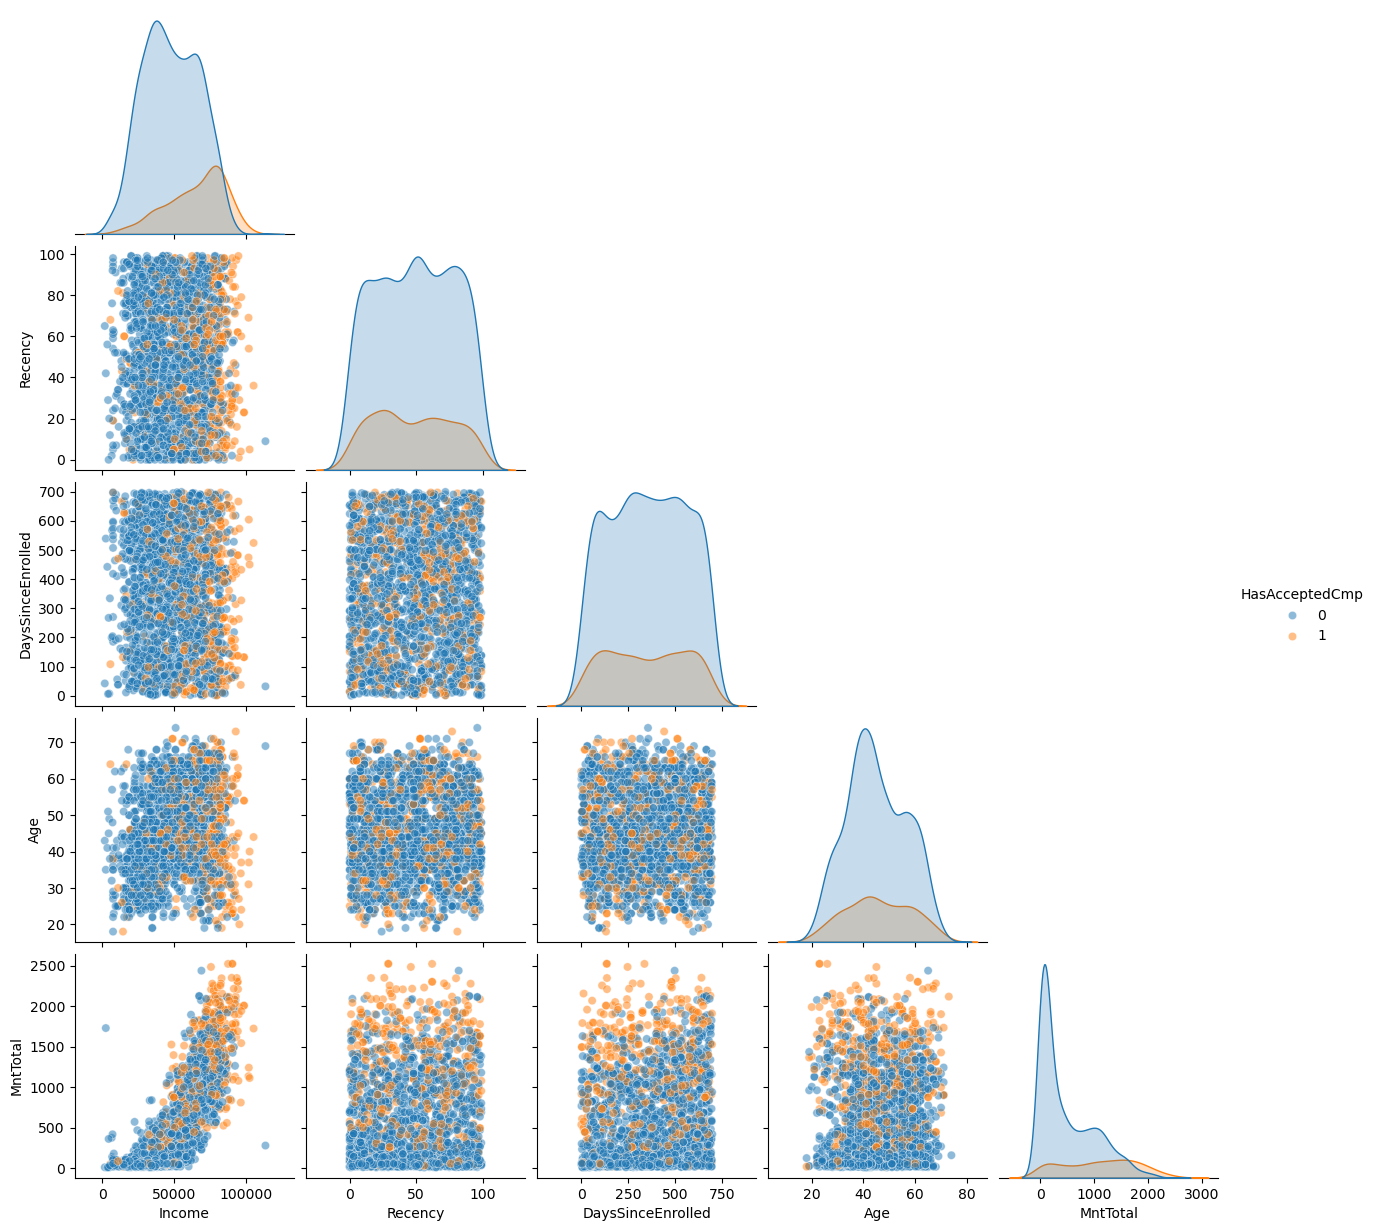

In [91]:
pairplot(df, columns_analysis, "HasAcceptedCmp")

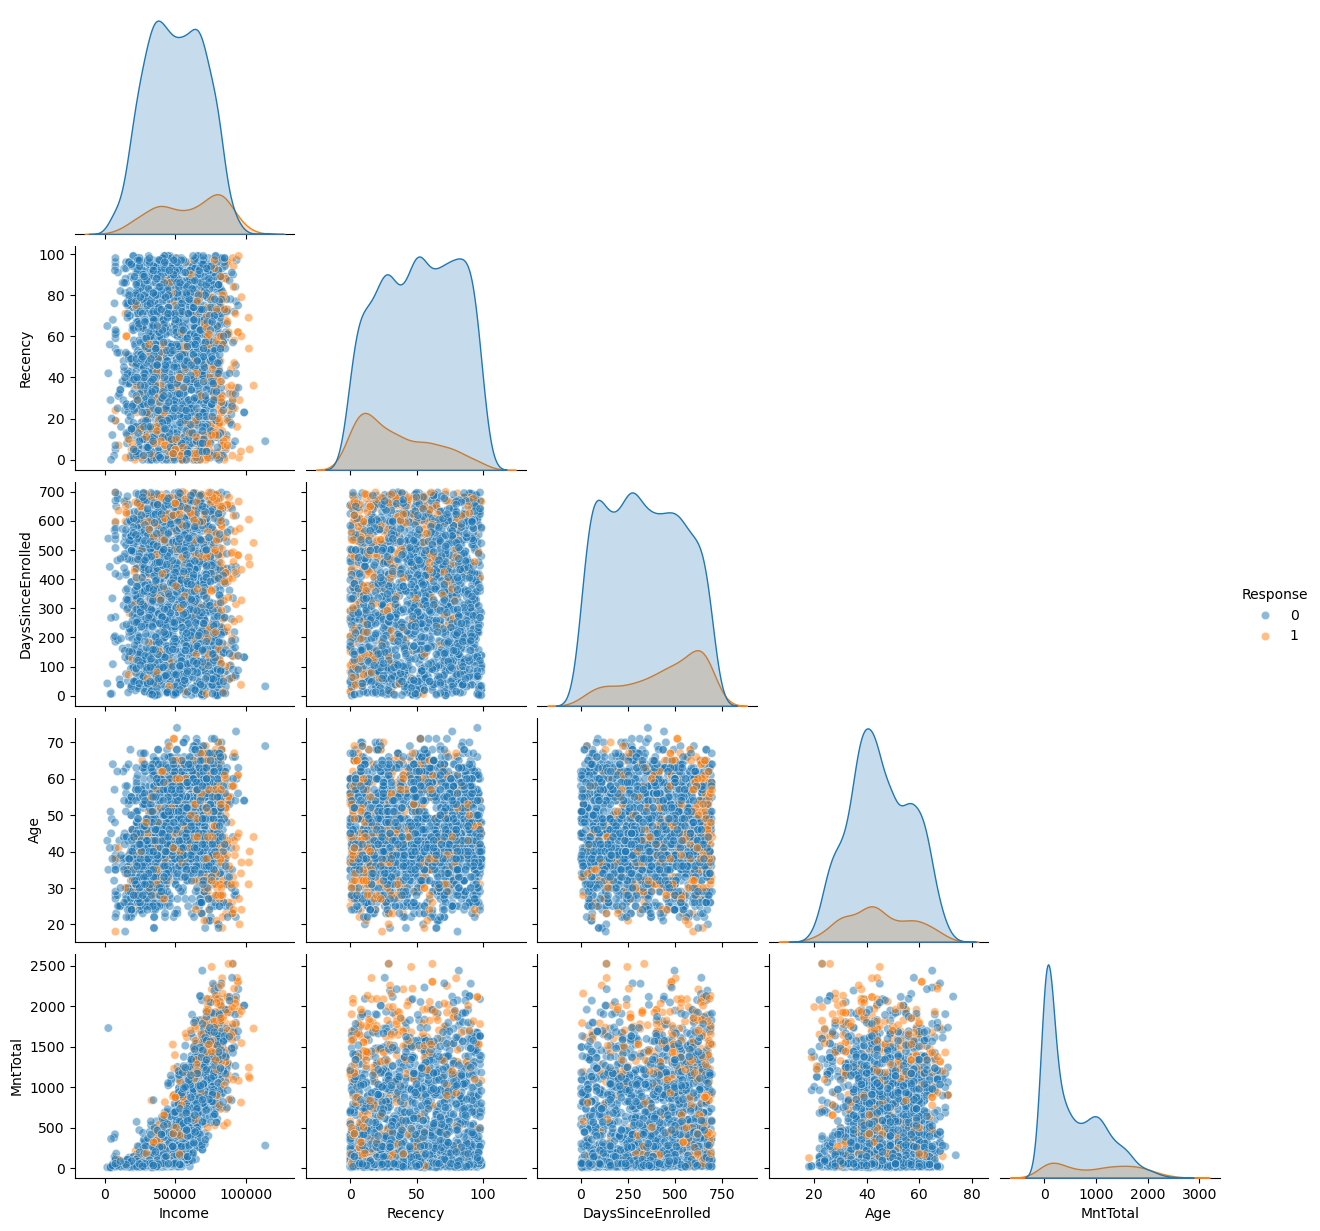

In [92]:
pairplot(df, columns_analysis, "Response")

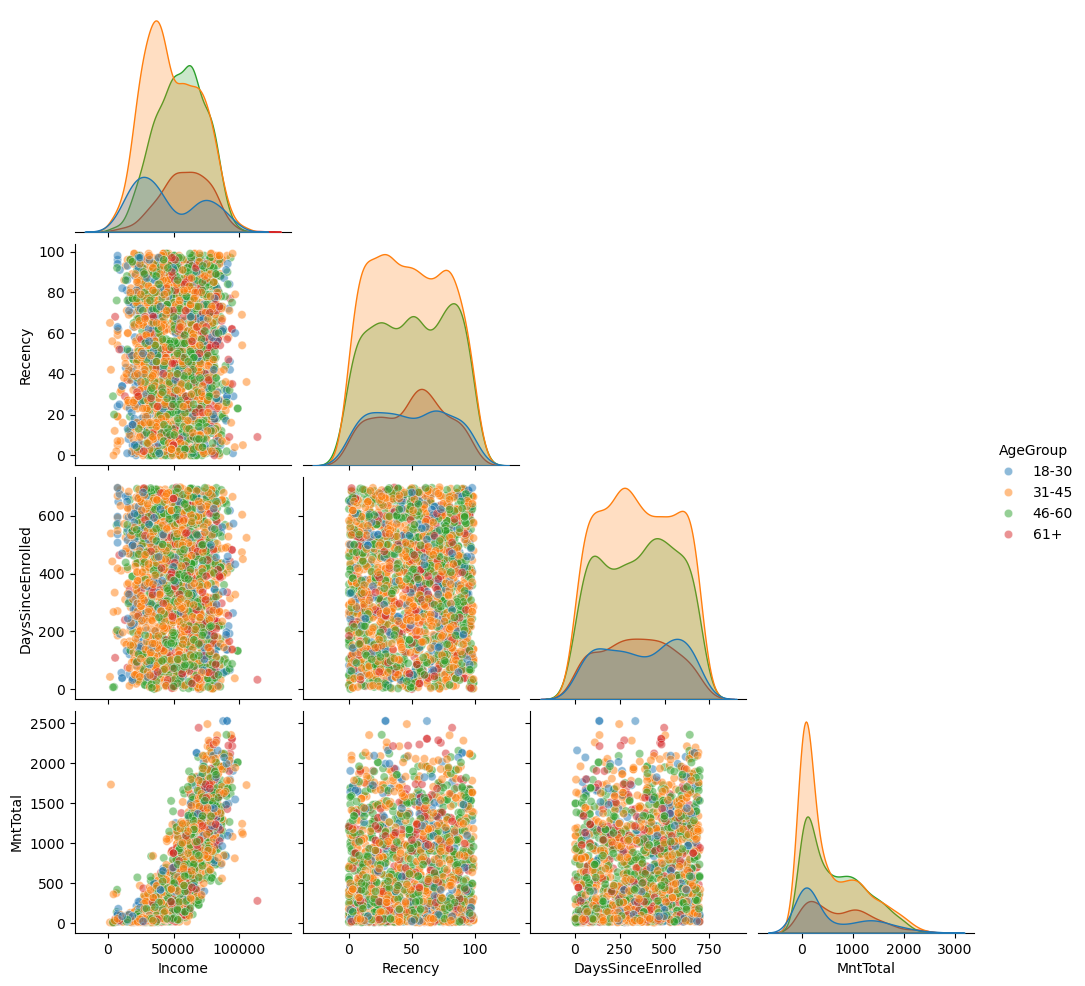

In [93]:
columns_analysis_without_age = columns_analysis.copy()
columns_analysis_without_age.remove("Age")
pairplot(df, columns_analysis_without_age, "AgeGroup")


### 📦 **Generating Boxplots to Enhance Column Understanding**

Boxplots were generated to better understand the distribution of specific columns and analyze the relationship between two variables.  
This helps us observe patterns, variability, and potential influence one feature may have on another.

<Axes: xlabel='Education', ylabel='Income'>

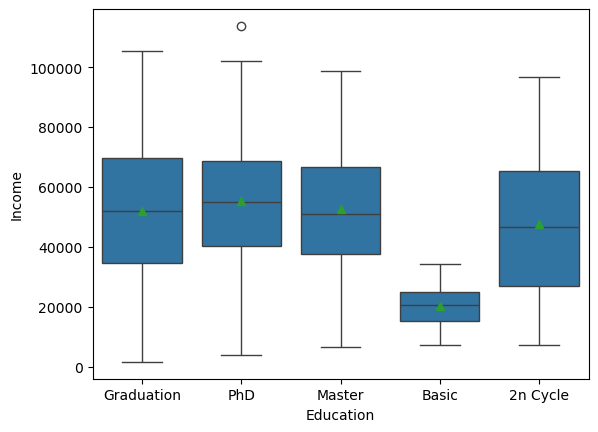

In [94]:
sns.boxplot(x="Education", y="Income", data=df, showmeans=True)

<Axes: xlabel='Education', ylabel='Income'>

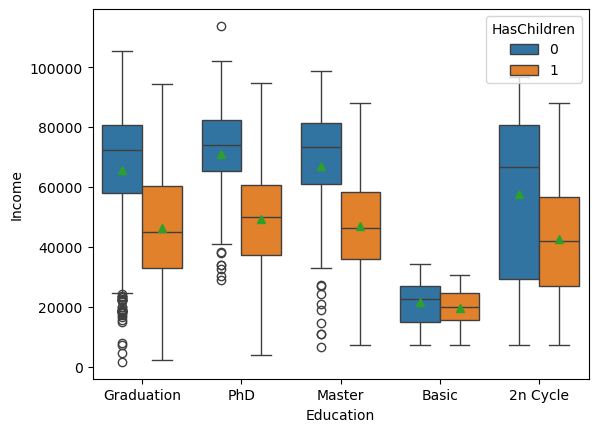

In [95]:
sns.boxplot(x="Education" ,y="Income", data=df,showmeans=True, hue="HasChildren")


<Axes: xlabel='Education', ylabel='Income'>

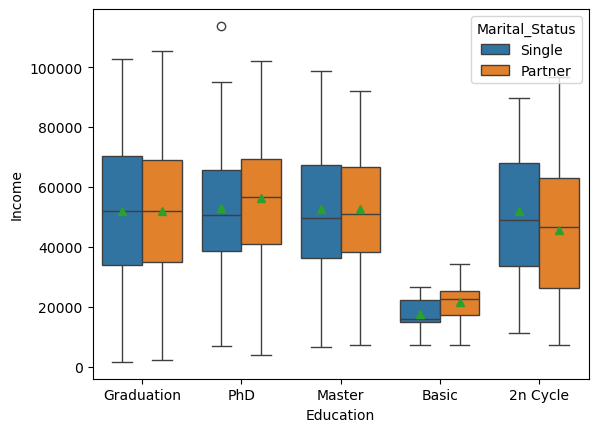

In [96]:
sns.boxplot(x="Education" ,y="Income", data=df,showmeans=True, hue="Marital_Status")


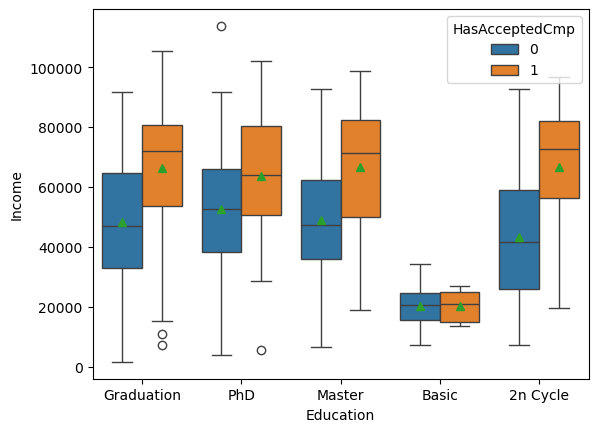

In [97]:
sns.boxplot(x="Education" ,y="Income", data=df,showmeans=True, hue="HasAcceptedCmp");

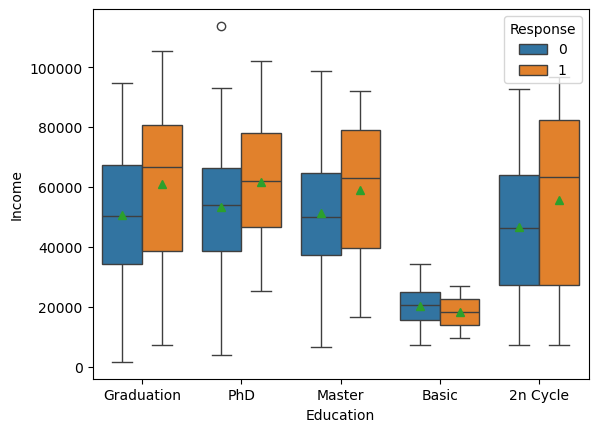

In [98]:
sns.boxplot(x="Education" ,y="Income", data=df,showmeans=True, hue="Response");


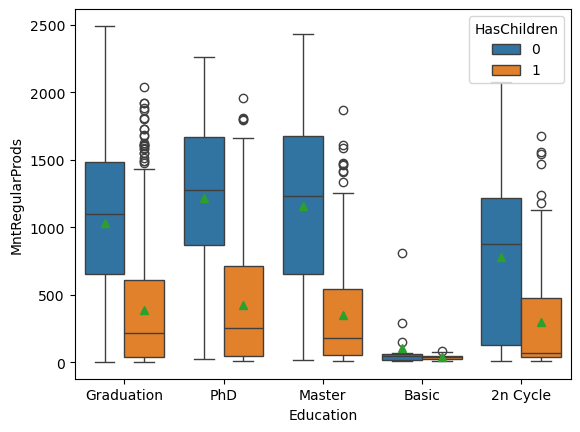

In [99]:
sns.boxplot(x="Education" ,y="MntRegularProds", data=df,showmeans=True, hue="HasChildren");


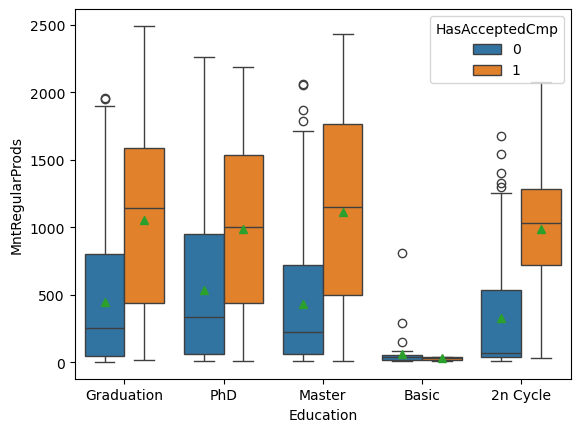

In [100]:
sns.boxplot(x="Education" ,y="MntRegularProds", data=df,showmeans=True, hue="HasAcceptedCmp");


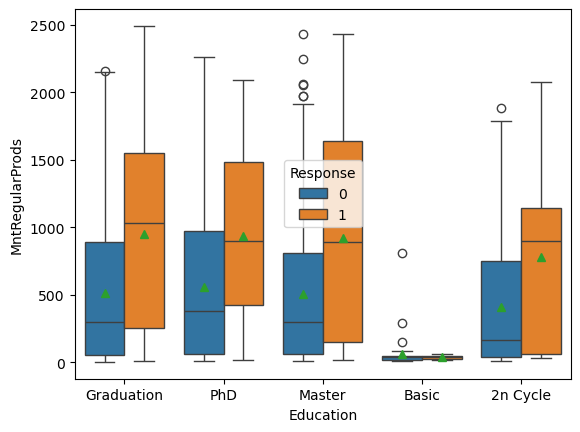

In [101]:
sns.boxplot(x="Education" ,y="MntRegularProds", data=df,showmeans=True, hue="Response");


<Axes: xlabel='Education', ylabel='Income'>

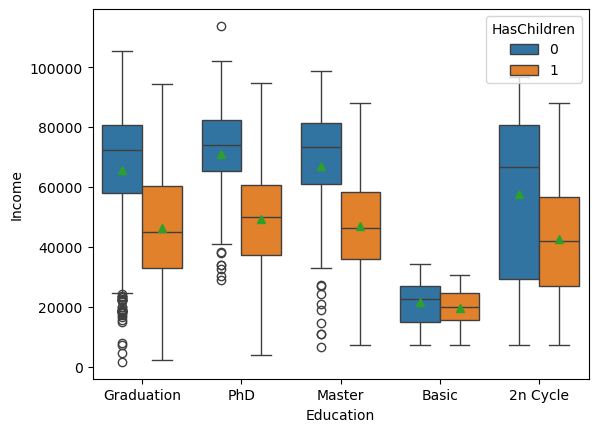

In [102]:
sns.boxplot(x="Education" ,y="Income", data=df,showmeans=True, hue="HasChildren")


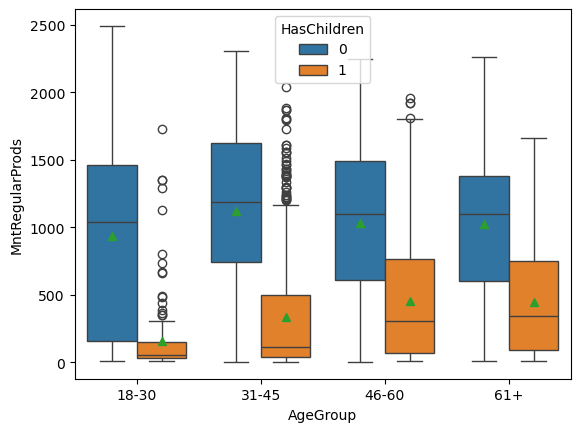

In [103]:
sns.boxplot(x="AgeGroup" ,y="MntRegularProds", data=df,showmeans=True, hue="HasChildren");


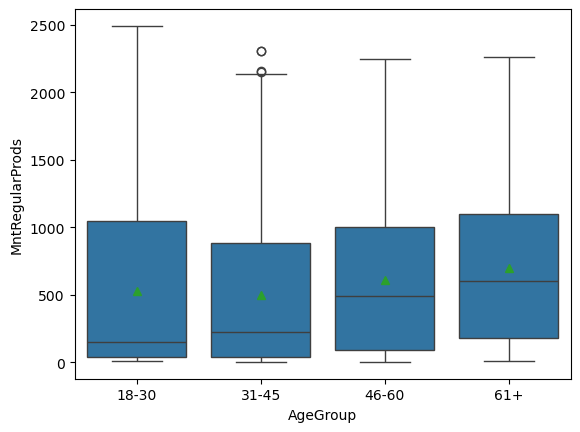

In [104]:
sns.boxplot(x="AgeGroup" ,y="MntRegularProds", data=df,showmeans=True);

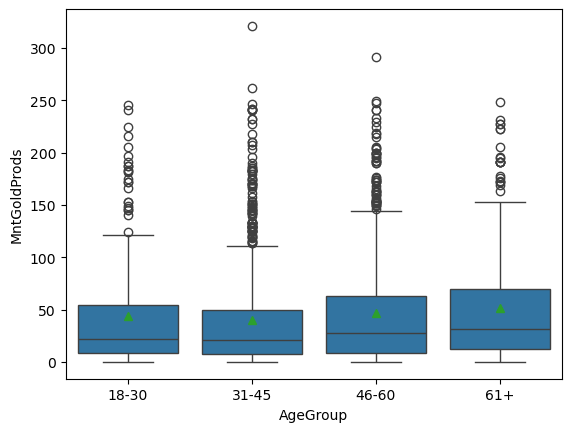

In [105]:
sns.boxplot(x="AgeGroup" ,y="MntGoldProds", data=df,showmeans=True);


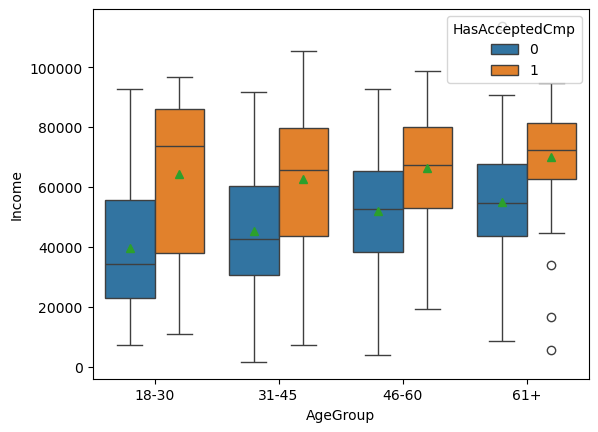

In [106]:
sns.boxplot(x="AgeGroup" ,y="Income", data=df,showmeans=True, hue="HasAcceptedCmp");


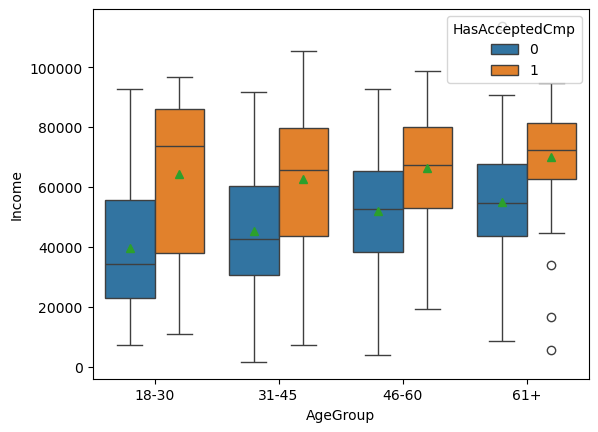

In [107]:
sns.boxplot(x="AgeGroup" ,y="Income", data=df,showmeans=True, hue="HasAcceptedCmp");


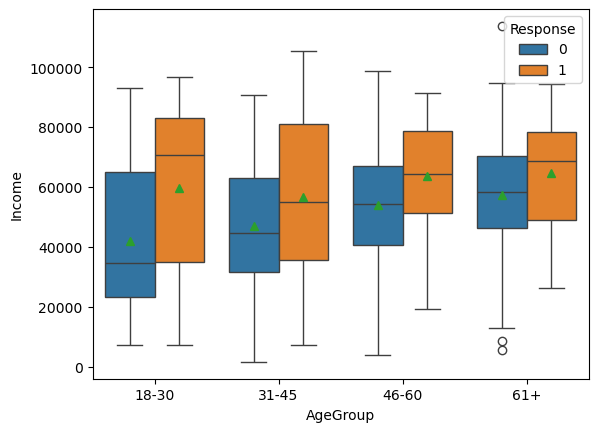

In [108]:
sns.boxplot(x="AgeGroup" ,y="Income", data=df,showmeans=True, hue="Response");



## 🔄 **Transforming Columns**

- We transformed **text (categorical) columns** into **numeric** ones using `get_dummies`, so we could apply correlation analysis.  
- **Correlation** is a measure that indicates how strongly two variables are related.  
- The `get_dummies` method converts categorical columns into **binary (0 and 1)** columns, making them suitable for numerical analysis.


In [109]:
df_dummies = pd.get_dummies(df, dtype='uint8')
df_dummies.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  Education_Basic  \
0              172                88            88  ...                0   
1                2                 1             6  ...                0   
2              111                21            42  ...                0   
3               10                 3             5  ...                0   
4               46                27            15  ...                0   

   Education_Graduation  Education_Master  Education_PhD  \
0                     1                 0              0   
1                     1                 0              0   
2                     1                 0              0   
3                     1                 0              0   
4                     0                 0              1   

   Marital_Status_Partner  Marital_Status_Single  AgeGroup_18-30  \
0                       0                      1               0   
1                       0                      1               0   
2                       1                      0               0   
3                       1                      0               1   
4                       1                      0               0   

   AgeGroup_31-45  AgeGroup_46-60  AgeGroup_61+  
0               0               1             0  
1               0               1             0  
2               0               1             0  
3               0               0             0  
4               1               0             0  

[5 rows x 43 columns]

In [110]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Income                  2205 non-null   float64
 1   Kidhome                 2205 non-null   int64  
 2   Teenhome                2205 non-null   int64  
 3   Recency                 2205 non-null   int64  
 4   MntWines                2205 non-null   int64  
 5   MntFruits               2205 non-null   int64  
 6   MntMeatProducts         2205 non-null   int64  
 7   MntFishProducts         2205 non-null   int64  
 8   MntSweetProducts        2205 non-null   int64  
 9   MntGoldProds            2205 non-null   int64  
 10  NumDealsPurchases       2205 non-null   int64  
 11  NumWebPurchases         2205 non-null   int64  
 12  NumCatalogPurchases     2205 non-null   int64  
 13  NumStorePurchases       2205 non-null   int64  
 14  NumWebVisitsMonth       2205 non-null   int64

In [111]:
df_dummies.to_csv("../data/customer_new_features_and_drop_dummies.csv", index=False)


## 📊 **Creating a New DataFrame**

- We developed a new DataFrame to display the **correlations** between the columns.  
- Correlation values range from **0 to 1**, where **0** means no correlation between the columns, and **1** means a perfect positive correlation.


In [112]:
df_dummies_corr = df_dummies.corr()
df_dummies_corr

Income   Kidhome  Teenhome   Recency  MntWines  \
Income                  1.000000 -0.531699  0.042483  0.006716  0.730495   
Kidhome                -0.531699  1.000000 -0.040207  0.011829 -0.499288   
Teenhome                0.042483 -0.040207  1.000000  0.013881  0.002783   
Recency                 0.006716  0.011829  0.013881  1.000000  0.016470   
MntWines                0.730495 -0.499288  0.002783  0.016470  1.000000   
MntFruits               0.537920 -0.374388 -0.176925 -0.004909  0.384947   
MntMeatProducts         0.702500 -0.445665 -0.267177  0.026138  0.593119   
MntFishProducts         0.551758 -0.389895 -0.206371  0.001177  0.395967   
MntSweetProducts        0.555601 -0.379101 -0.164246  0.025535  0.388613   
MntGoldProds            0.417653 -0.356550 -0.019619  0.018558  0.390194   
NumDealsPurchases      -0.132427  0.226434  0.394341  0.000479  0.011858   
NumWebPurchases         0.503184 -0.375590  0.161229 -0.005104  0.552342   
NumCatalogPurchases     0.710057 -0.519813 -0.114019  0.029750  0.673234   
NumStorePurchases       0.687206 -0.506543  0.047321  0.000462  0.639373   
NumWebVisitsMonth      -0.648306  0.448497  0.129365 -0.017906 -0.329395   
AcceptedCmp3           -0.011181  0.015897 -0.043223 -0.032327  0.060700   
AcceptedCmp4            0.233267 -0.162597  0.037860  0.017658  0.373063   
AcceptedCmp5            0.416386 -0.205124 -0.190760  0.000334  0.472729   
AcceptedCmp1            0.345242 -0.174741 -0.145748 -0.021097  0.351346   
AcceptedCmp2            0.110210 -0.082124 -0.015805 -0.001390  0.206231   
Complain               -0.027488  0.037025  0.007633  0.005758 -0.036709   
Response                0.174902 -0.078409 -0.155196 -0.200413  0.245559   
DaysSinceEnrolled      -0.024892 -0.055743  0.019394  0.028338  0.168102   
YearsSinceEnrolled     -0.002489 -0.046984  0.015813  0.030129  0.149257   
Age                     0.212625 -0.238083  0.362919  0.014228  0.164438   
MntTotal                0.823770 -0.558234 -0.138565  0.021824  0.897262   
MntRegularProds         0.823066 -0.551152 -0.142995  0.021132  0.902310   
Children               -0.350313  0.687697  0.697760  0.018566 -0.355922   
HasChildren            -0.410545  0.519610  0.587361  0.002109 -0.345055   
AcceptedCmpTotal        0.388247 -0.212080 -0.130255 -0.013344  0.509913   
HasAcceptedCmp          0.336105 -0.203011 -0.100674 -0.016200  0.463465   
NumTotalPurchases       0.778849 -0.574489  0.038391  0.009858  0.761642   
Education_2n Cycle     -0.060621  0.019050 -0.056259 -0.006789 -0.096259   
Education_Basic        -0.239604  0.055308 -0.120519 -0.003093 -0.140369   
Education_Graduation    0.017644 -0.001930 -0.024698  0.031419 -0.060920   
Education_Master        0.021633  0.011482  0.023806 -0.025563  0.036403   
Education_PhD           0.091176 -0.042031  0.092901 -0.009234  0.160804   
Marital_Status_Partner  0.004610 -0.000689  0.052042 -0.000154  0.005738   
Marital_Status_Single  -0.004610  0.000689 -0.052042  0.000154 -0.005738   
AgeGroup_18-30         -0.112011  0.064113 -0.338075  0.001254 -0.069436   
AgeGroup_31-45         -0.126099  0.213639 -0.124902 -0.032791 -0.103705   
AgeGroup_46-60          0.123550 -0.167900  0.311466  0.027028  0.088864   
AgeGroup_61+            0.124547 -0.146678  0.073968  0.009705  0.098456   

                        MntFruits  MntMeatProducts  MntFishProducts  \
Income                   0.537920         0.702500         0.551758   
Kidhome                 -0.374388        -0.445665        -0.389895   
Teenhome                -0.176925        -0.267177        -0.206371   
Recency                 -0.004909         0.026138         0.001177   
MntWines                 0.384947         0.593119         0.395967   
MntFruits                1.000000         0.568100         0.592556   
MntMeatProducts          0.568100         1.000000         0.595673   
MntFishProducts          0.592556         0.595673         1.000000   
MntSweetProducts         0.570986         

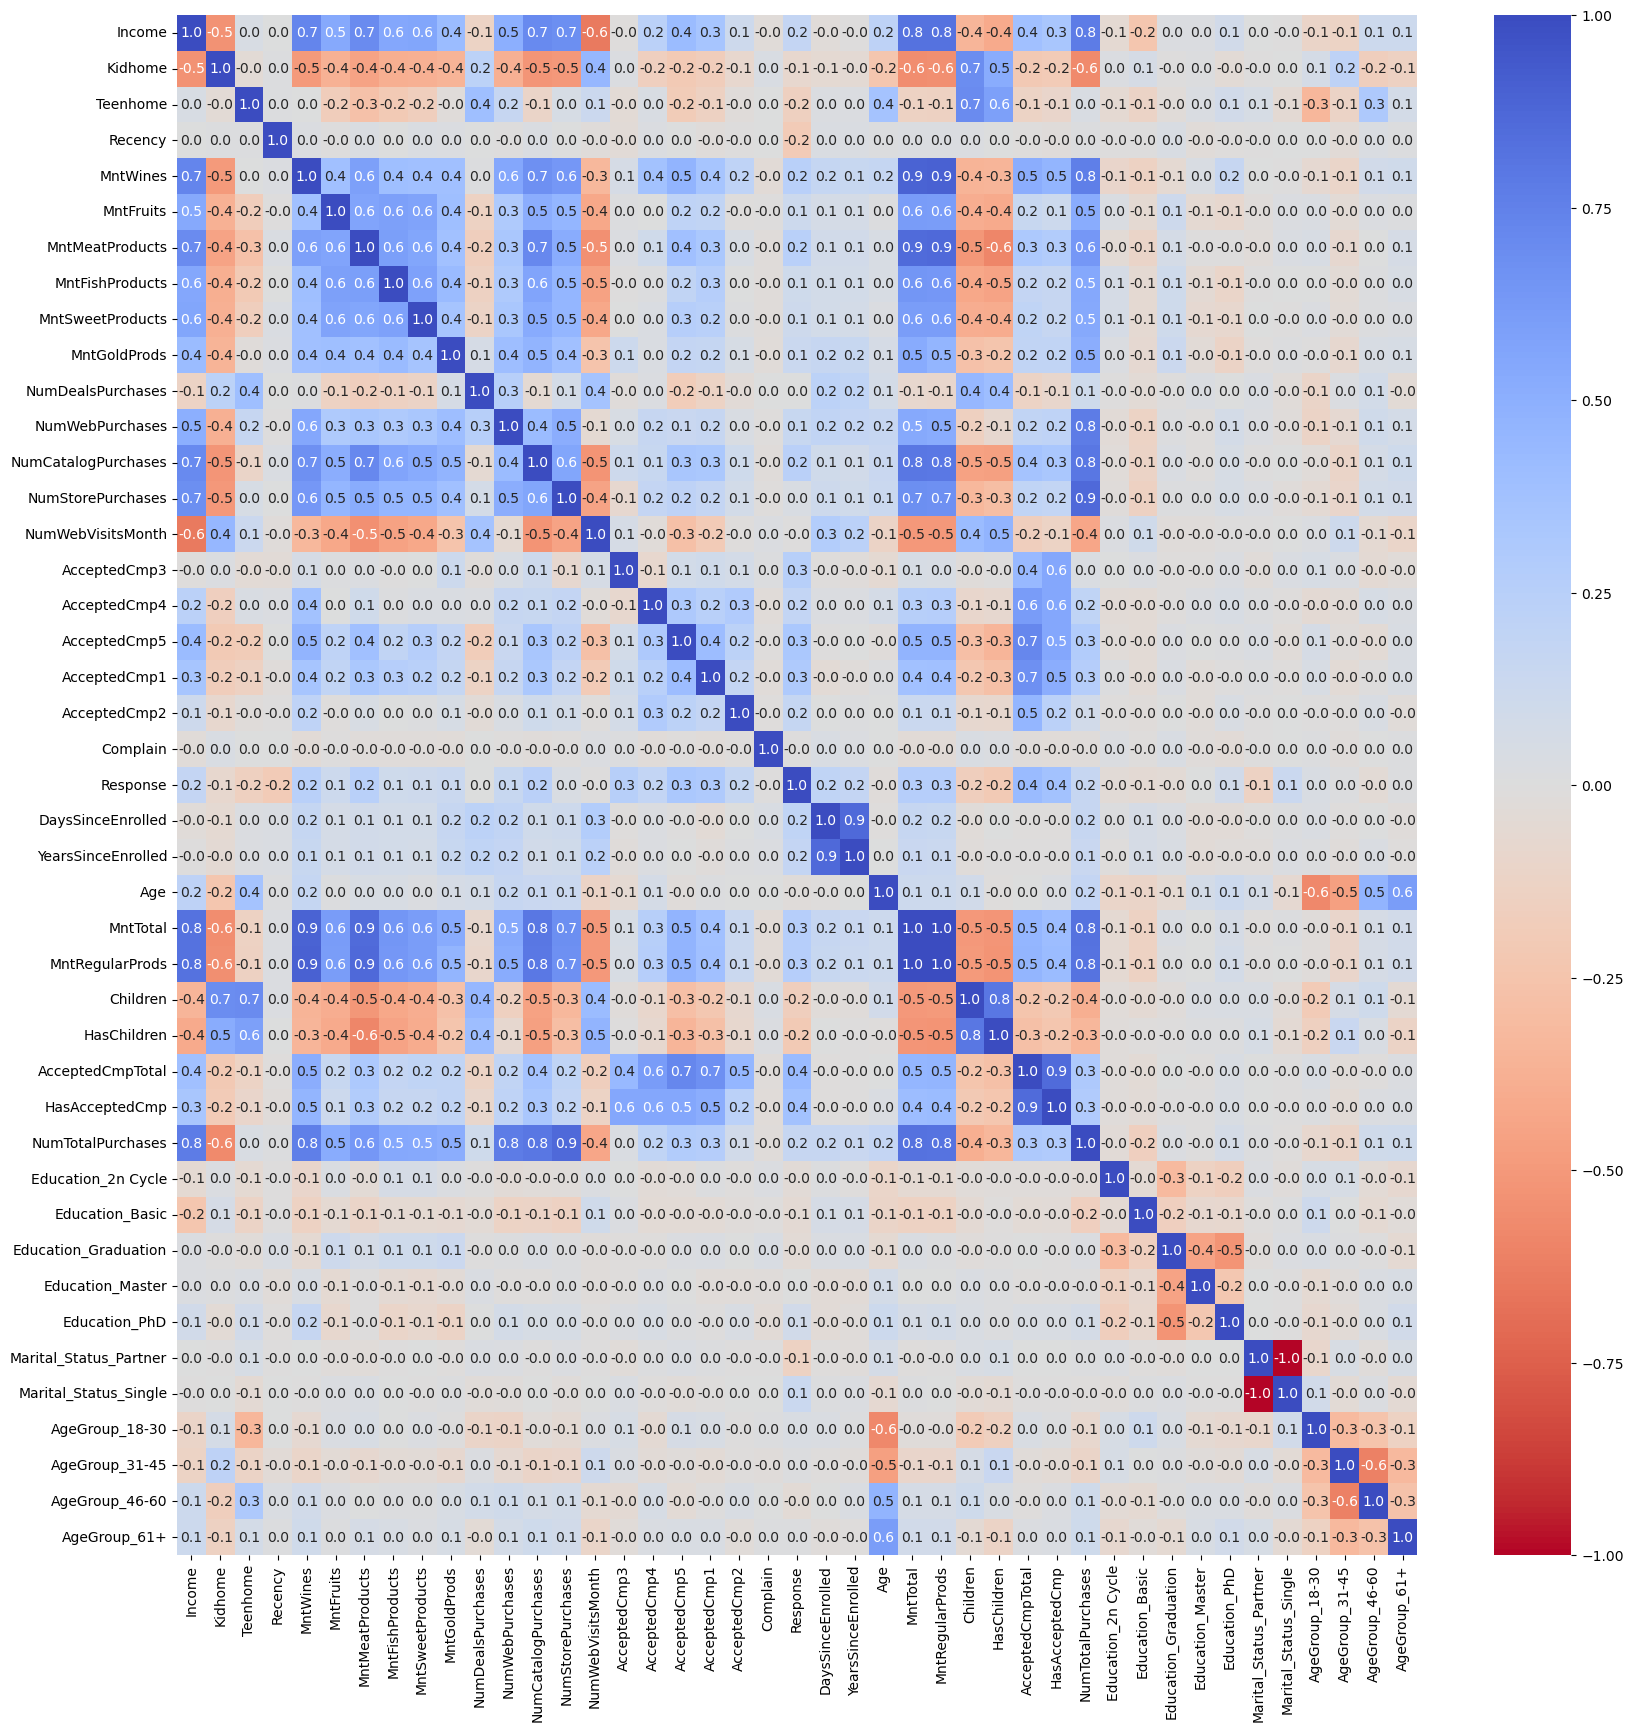

In [113]:
fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(df_dummies_corr, annot=True, ax=ax, fmt=".1f", cmap="coolwarm_r");

In [114]:
df_dummies_corr_unstack = pd.DataFrame(df_dummies_corr.unstack())
df_dummies_corr_unstack = df_dummies_corr_unstack.rename(columns={0:"corr"})
df_dummies_corr_unstack.head(30)

corr
Income Income               1.000000
       Kidhome             -0.531699
       Teenhome             0.042483
       Recency              0.006716
       MntWines             0.730495
       MntFruits            0.537920
       MntMeatProducts      0.702500
       MntFishProducts      0.551758
       MntSweetProducts     0.555601
       MntGoldProds         0.417653
       NumDealsPurchases   -0.132427
       NumWebPurchases      0.503184
       NumCatalogPurchases  0.710057
       NumStorePurchases    0.687206
       NumWebVisitsMonth   -0.648306
       AcceptedCmp3        -0.011181
       AcceptedCmp4         0.233267
       AcceptedCmp5         0.416386
       AcceptedCmp1         0.345242
       AcceptedCmp2         0.110210
       Complain            -0.027488
       Response             0.174902
       DaysSinceEnrolled   -0.024892
       YearsSinceEnrolled  -0.002489
       Age                  0.212625
       MntTotal             0.823770
       MntRegularProds      0.823066
       Children            -0.350313
       HasChildren         -0.410545
       AcceptedCmpTotal     0.388247

In [115]:
df_dummies_corr_unstack.loc["Income"].sort_values(by="corr")

corr
NumWebVisitsMonth      -0.648306
Kidhome                -0.531699
HasChildren            -0.410545
Children               -0.350313
Education_Basic        -0.239604
NumDealsPurchases      -0.132427
AgeGroup_31-45         -0.126099
AgeGroup_18-30         -0.112011
Education_2n Cycle     -0.060621
Complain               -0.027488
DaysSinceEnrolled      -0.024892
AcceptedCmp3           -0.011181
Marital_Status_Single  -0.004610
YearsSinceEnrolled     -0.002489
Marital_Status_Partner  0.004610
Recency                 0.006716
Education_Graduation    0.017644
Education_Master        0.021633
Teenhome                0.042483
Education_PhD           0.091176
AcceptedCmp2            0.110210
AgeGroup_46-60          0.123550
AgeGroup_61+            0.124547
Response                0.174902
Age                     0.212625
AcceptedCmp4            0.233267
HasAcceptedCmp          0.336105
AcceptedCmp1            0.345242
AcceptedCmpTotal        0.388247
AcceptedCmp5            0.416386
MntGoldProds            0.417653
NumWebPurchases         0.503184
MntFruits               0.537920
MntFishProducts         0.551758
MntSweetProducts        0.555601
NumStorePurchases       0.687206
MntMeatProducts         0.702500
NumCatalogPurchases     0.710057
MntWines                0.730495
NumTotalPurchases       0.778849
MntRegularProds         0.823066
MntTotal                0.823770
Income                  1.000000

In [116]:
df_dummies_corr_unstack.loc["Age"].sort_values(by="corr")

corr
AgeGroup_18-30         -0.580462
AgeGroup_31-45         -0.464348
Kidhome                -0.238083
NumWebVisitsMonth      -0.122713
Education_Basic        -0.115872
Education_2n Cycle     -0.104364
Marital_Status_Single  -0.067889
Education_Graduation   -0.061579
AcceptedCmp3           -0.061405
Response               -0.021305
AcceptedCmp5           -0.019275
DaysSinceEnrolled      -0.013462
HasChildren            -0.012013
AcceptedCmpTotal        0.001529
YearsSinceEnrolled      0.003869
Complain                0.004531
AcceptedCmp2            0.007737
AcceptedCmp1            0.011747
MntFruits               0.013149
Recency                 0.014228
MntSweetProducts        0.021075
HasAcceptedCmp          0.030203
MntFishProducts         0.040855
MntMeatProducts         0.041540
MntGoldProds            0.059295
Marital_Status_Partner  0.067889
AcceptedCmp4            0.069903
NumDealsPurchases       0.072005
Education_Master        0.074754
Children                0.093007
MntRegularProds         0.118370
MntTotal                0.118404
Education_PhD           0.123429
NumStorePurchases       0.138614
NumCatalogPurchases     0.140724
NumWebPurchases         0.161839
MntWines                0.164438
NumTotalPurchases       0.179130
Income                  0.212625
Teenhome                0.362919
AgeGroup_46-60          0.469812
AgeGroup_61+            0.603412
Age                     1.000000

In [117]:
df_dummies_corr_unstack.loc["MntTotal"].sort_values(by="corr")

corr
Kidhome                -0.558234
HasChildren            -0.523234
NumWebVisitsMonth      -0.501937
Children               -0.500883
Teenhome               -0.138565
Education_Basic        -0.138291
AgeGroup_31-45         -0.099767
NumDealsPurchases      -0.078956
Education_2n Cycle     -0.056043
Complain               -0.034167
AgeGroup_18-30         -0.020575
Marital_Status_Partner -0.008213
Education_Master        0.003296
Marital_Status_Single   0.008213
Recency                 0.021824
Education_Graduation    0.025049
AcceptedCmp3            0.053411
Education_PhD           0.057482
AgeGroup_46-60          0.058827
AgeGroup_61+            0.087625
Age                     0.118404
AcceptedCmp2            0.136832
YearsSinceEnrolled      0.146639
DaysSinceEnrolled       0.157917
AcceptedCmp4            0.250102
Response                0.265620
AcceptedCmp1            0.382727
HasAcceptedCmp          0.413036
AcceptedCmpTotal        0.458284
AcceptedCmp5            0.470360
MntGoldProds            0.529845
NumWebPurchases         0.533702
MntSweetProducts        0.609244
MntFruits               0.614464
MntFishProducts         0.644453
NumStorePurchases       0.682306
NumCatalogPurchases     0.797844
NumTotalPurchases       0.822488
Income                  0.823770
MntMeatProducts         0.856838
MntWines                0.897262
MntRegularProds         0.997094
MntTotal                1.000000

In [118]:
df_dummies_corr_unstack.loc["Response"].sort_values(by="corr")

corr
HasChildren            -0.205308
Recency                -0.200413
Children               -0.168976
Teenhome               -0.155196
Marital_Status_Partner -0.136307
Kidhome                -0.078409
Education_Basic        -0.050437
Education_Graduation   -0.040749
AgeGroup_46-60         -0.039852
Education_2n Cycle     -0.035008
Age                    -0.021305
NumWebVisitsMonth      -0.005358
Complain               -0.000273
Education_Master        0.003509
NumDealsPurchases       0.004691
AgeGroup_61+            0.008916
AgeGroup_31-45          0.011045
AgeGroup_18-30          0.032317
NumStorePurchases       0.033509
Education_PhD           0.089627
MntFishProducts         0.107405
MntSweetProducts        0.115326
MntFruits               0.122331
Marital_Status_Single   0.136307
MntGoldProds            0.140210
NumWebPurchases         0.149699
NumTotalPurchases       0.163609
AcceptedCmp2            0.169128
YearsSinceEnrolled      0.174524
Income                  0.174902
AcceptedCmp4            0.179727
DaysSinceEnrolled       0.196520
NumCatalogPurchases     0.234524
MntWines                0.245559
MntMeatProducts         0.248821
AcceptedCmp3            0.253576
MntRegularProds         0.264895
MntTotal                0.265620
AcceptedCmp1            0.296978
AcceptedCmp5            0.324648
HasAcceptedCmp          0.367892
AcceptedCmpTotal        0.426961
Response                1.000000

In [119]:
response_corr = df_dummies_corr_unstack.loc["Response"].sort_values(by="corr")[:-1]
response_corr

corr
HasChildren            -0.205308
Recency                -0.200413
Children               -0.168976
Teenhome               -0.155196
Marital_Status_Partner -0.136307
Kidhome                -0.078409
Education_Basic        -0.050437
Education_Graduation   -0.040749
AgeGroup_46-60         -0.039852
Education_2n Cycle     -0.035008
Age                    -0.021305
NumWebVisitsMonth      -0.005358
Complain               -0.000273
Education_Master        0.003509
NumDealsPurchases       0.004691
AgeGroup_61+            0.008916
AgeGroup_31-45          0.011045
AgeGroup_18-30          0.032317
NumStorePurchases       0.033509
Education_PhD           0.089627
MntFishProducts         0.107405
MntSweetProducts        0.115326
MntFruits               0.122331
Marital_Status_Single   0.136307
MntGoldProds            0.140210
NumWebPurchases         0.149699
NumTotalPurchases       0.163609
AcceptedCmp2            0.169128
YearsSinceEnrolled      0.174524
Income                  0.174902
AcceptedCmp4            0.179727
DaysSinceEnrolled       0.196520
NumCatalogPurchases     0.234524
MntWines                0.245559
MntMeatProducts         0.248821
AcceptedCmp3            0.253576
MntRegularProds         0.264895
MntTotal                0.265620
AcceptedCmp1            0.296978
AcceptedCmp5            0.324648
HasAcceptedCmp          0.367892
AcceptedCmpTotal        0.426961


### 📉 **Correlation Plot with the `Response` Column**

The plot below shows the **correlation** of all columns in the dataset with the **`Response`** column, which indicates whether a customer accepted the offer in the last campaign.

In [120]:
from matplotlib.colors import CenteredNorm, ListedColormap
from matplotlib.cm import ScalarMappable

cmap = "coolwarm_r"
cnorm = CenteredNorm(vcenter=0, halfrange=0.4)
smap = ScalarMappable(norm=cnorm, cmap=cmap)

listed_colors = ListedColormap([smap.to_rgba(x) for x in response_corr["corr"]]).colors

C:\Users\cross\AppData\Local\Temp\ipykernel_9080\1266949299.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.barplot(x=response_corr.index, y=response_corr["corr"], palette=listed_colors)


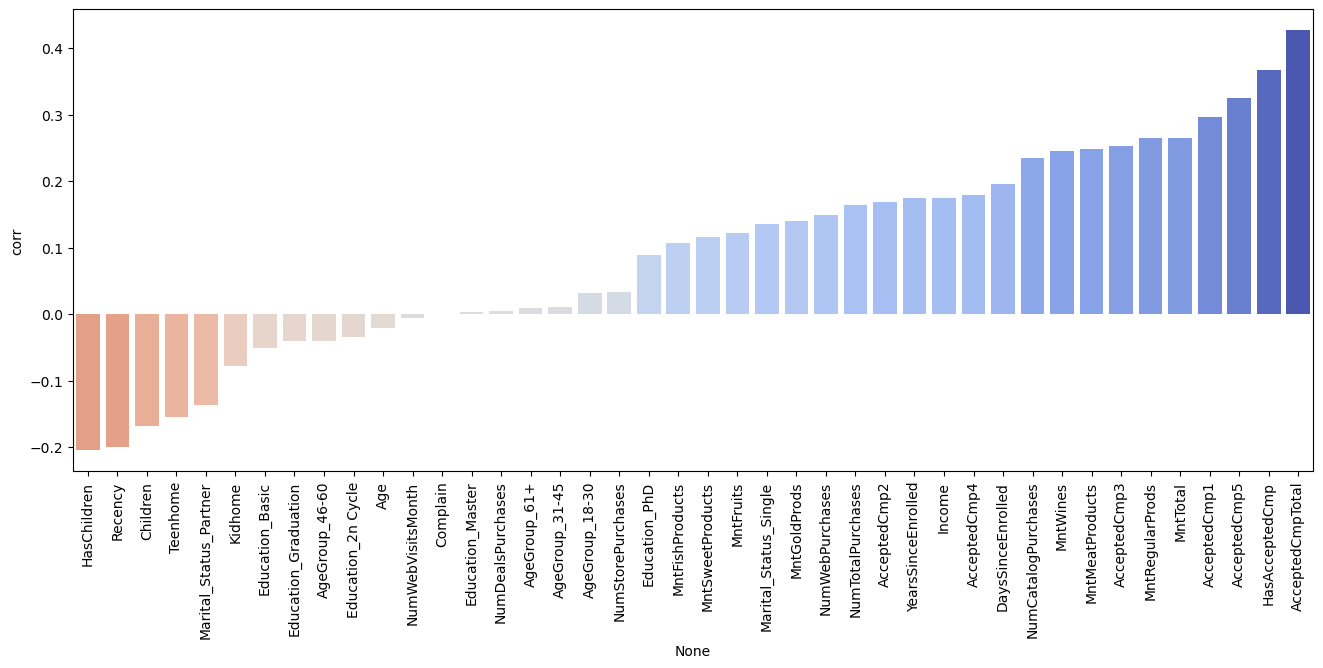

In [121]:
fig, ax = plt.subplots(figsize=(16, 6))

b = sns.barplot(x=response_corr.index, y=response_corr["corr"], palette=listed_colors)
b.tick_params(axis="x", rotation=90)
plt.show()